In [1]:
import math
import time
import seaborn as sns
import pandas as pd
import numpy as np
import itertools
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from copy import deepcopy
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
#%matplotlib notebook
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
corr_features = ['DENSITY, g/cm3', 'RDEEP, ohm.m', 'DTC, us/ft', 'DTS, US/F', 'GR, gAPI', 'NEUTRON, CFCF',
                 'NMR_FF, v/v', 'NMR_TPOR, v/v', 'NMR_BW, v/v', 'NMR_CBW, v/v']

df = pd.read_csv('norphlet_scaled.csv', encoding='utf8')
print(df.shape)
df[corr_features].isna().sum()

(15956, 23)


DENSITY, g/cm3     373
RDEEP, ohm.m        21
DTC, us/ft         619
DTS, US/F          750
GR, gAPI            92
NEUTRON, CFCF      419
NMR_FF, v/v       1562
NMR_TPOR, v/v     1562
NMR_BW, v/v       1562
NMR_CBW, v/v      1562
dtype: int64

In [3]:
df = df.dropna(subset=corr_features)
df = df.reset_index(drop=True)
print(df.shape)
df.head()

(14273, 23)


Well name       Field Field part    MD, ft  DENSITY, g/cm3  DTC, us/ft  \
0  MC348-3ST1  Appomattox         NE  25654.00       11.810724   -3.282618   
1  MC348-3ST1  Appomattox         NE  25654.25       11.862163   -3.241252   
2  MC348-3ST1  Appomattox         NE  25654.50       11.349167   -3.199886   
3  MC348-3ST1  Appomattox         NE  25654.75       10.406590   -3.159990   
4  MC348-3ST1  Appomattox         NE  25655.00        9.138699   -3.120095   

   DTS, US/F  FLD, unitless  GR, gAPI  NEUTRON, CFCF  NMR_BW, v/v  \
0  -3.292020            2.0 -1.185375      -0.406330    -2.059905   
1  -3.266110            2.0 -1.671831      -1.135766    -2.043275   
2  -3.239986            2.0 -2.028623      -1.625015    -2.032059   
3  -3.175953            2.0 -2.196745      -2.041383    -1.981783   
4  -3.110656            2.0 -2.467159      -2.384871    -1.728851   

   NMR_CBW, v/v  NMR_FF, v/v  NMR_TPOR, v/v  RDEEP, ohm.m   TVD, ft  \
0      0.044636    -3.042459      -4.929566      0.041163  25215.80   
1      1.172220    -3.029381      -4.618738      0.175006  25216.02   
2      0.885594    -3.025518      -4.679422      0.446352  25216.24   
3      0.161935    -2.994211      -4.793384      0.761145  25216.46   
4      0.387073    -2.818953      -4.369072      1.031585  25216.68   

   TVDBML, ft  TVDSS, ft                          Filename  \
0    17884.80   25140.80  MC348-3ST1 Appomattox NE_LQC.csv   
1    17885.02   25141.02  MC348-3ST1 Appomattox NE_LQC.csv   
2    17885.24   25141.24  MC348-3ST1 Appomattox NE_LQC.csv   
3    17885.46   25141.46  MC348-3ST1 Appomattox NE_LQC.csv   
4    17885.68   25141.68  MC348-3ST1 Appomattox NE_LQC.csv   

               wellName_old datasetName  RMEDIUM, ohm.m  RSHALLOW, ohm.m  
0  MC348-3ST1 Appomattox NE         LQC        3.532304              NaN  
1  MC348-3ST1 Appomattox NE         LQC        3.514227              NaN  
2  MC348-3ST1 Appomattox NE         LQC        3.135936              NaN  
3  MC348-3ST1 Appomattox NE         LQC        2.886046              NaN  
4  MC348-3ST1 Appomattox NE         LQC        2.768231              NaN

In [4]:
df.describe()

MD, ft  DENSITY, g/cm3    DTC, us/ft     DTS, US/F  \
count  14273.000000    14273.000000  14273.000000  14273.000000   
mean   26173.766896       -0.022398      0.001225     -0.022841   
std      956.401021        1.007819      1.012984      0.968161   
min    24515.500000       -2.621274     -4.298291     -3.529837   
25%    25596.250000       -0.704033     -0.656559     -0.717600   
50%    25947.750000       -0.035498     -0.032157      0.005880   
75%    26404.386719        0.567362      0.714034      0.614659   
max    28694.603041       11.862163      2.499990      2.694533   

       FLD, unitless      GR, gAPI  NEUTRON, CFCF   NMR_BW, v/v  NMR_CBW, v/v  \
count   14273.000000  14273.000000   14273.000000  14273.000000  14273.000000   
mean        1.876900      0.025742       0.028404      0.002826      0.000560   
std         0.328563      0.957693       0.976030      0.995591      0.998798   
min         1.000000     -3.403203      -3.987679     -2.059905     -0.918352   
25%         2.000000     -0.589945      -0.484635     -0.667653     -0.786357   
50%         2.000000     -0.032862       0.161452     -0.214857     -0.318528   
75%         2.000000      0.572857       0.723809      0.412138      0.460872   
max         2.000000     13.273762       2.980867      4.163663      6.432404   

        NMR_FF, v/v  NMR_TPOR, v/v  RDEEP, ohm.m       TVD, ft    TVDBML, ft  \
count  14273.000000   14273.000000  14273.000000  14249.000000  14273.000000   
mean       0.008940       0.012836      0.100787  25589.165267  18219.939894   
std        0.991054       0.972585      0.920596   1140.328829   1110.746860   
min       -3.049558      -4.929566     -2.070083  24398.360000  16949.040000   
25%       -0.713955      -0.606574     -0.539085  24880.450000  17507.640000   
50%        0.070548      -0.006126      0.216097  25253.000000  17931.910000   
75%        0.759817       0.702076      0.744695  25658.360000  18350.490000   
max        2.778312       2.832126      2.239605  28661.040176  21187.040176   

          TVDSS, ft  RMEDIUM, ohm.m  RSHALLOW, ohm.m  
count  14273.000000     3899.000000      7330.000000  
mean   25510.567524        0.214976         0.126556  
std     1130.774351        0.936918         0.907833  
min    24320.040000       -1.627036        -1.859988  
25%    24804.350000       -0.360079        -0.633166  
50%    25181.750000        0.158531         0.305354  
75%    25590.100000        0.907637         0.794921  
max    28559.040176        3.532304         2.019214

In [5]:
print('Data points per well after removing missing values:')
for well in df['Well name'].unique():
    print('\t{}: {} datapoints'.format(well, df[df['Well name'] == well].shape[0]))

Data points per well after removing missing values:
	MC348-3ST1: 551 datapoints
	MC391-1: 2713 datapoints
	MC392-1: 950 datapoints
	MC392-1ST1: 3032 datapoints
	MC393-1: 3679 datapoints
	MC525-2: 1173 datapoints
	MC612-1BP1: 2175 datapoints


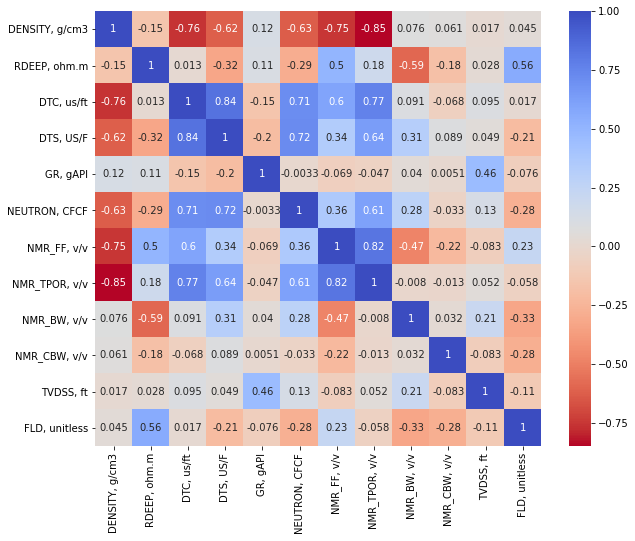

In [6]:
plt.figure(figsize=(10,8))
c = df[corr_features + ['TVDSS, ft', 'FLD, unitless']].corr(method ='spearman')    #pearson, kendall, spearman
sns.heatmap(c, cmap='coolwarm_r', annot=True)

In [ ]:
df_2d = deepcopy(df)
df_2d['wells'] = pd.Categorical(df_2d['Well name']).codes
df_pca = df_2d[corr_features]
pca = PCA(0.9)
transformed = pca.fit_transform(df_pca)
pca09_result = pd.DataFrame(transformed)
print(pca09_result.shape)
print('Explained variance:', pca.explained_variance_ratio_)
#print(pca.singular_values_)

In [ ]:
# plot features in 2D by well - not really useful, just as an example
pca_2 = PCA(2)
projected = pca_2.fit_transform(df_pca)
print('Explained variance:', sum(pca_2.explained_variance_ratio_))

plt.figure(figsize=(18,11))
plt.scatter(projected[:, 0], projected[:, 1], c=df_2d['wells'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 7))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

In [ ]:
df_2d, df_pca = None, None

In [ ]:
print('Min depth:', df['TVDSS, ft'].min())
print('Max depth:', df['TVDSS, ft'].max())
print('Difference:', math.ceil(df['TVDSS, ft'].max() - df['TVDSS, ft'].min()))

In [ ]:
# zero duplicates
df[df[corr_features].duplicated()]

In [ ]:
df_pca = deepcopy(df[corr_features])
print('          Shape of data before PCA:', df_pca.shape)
pca = PCA(0.9)
transformed = pca.fit_transform(df_pca)
pca09_result = pd.DataFrame(transformed)
print('           Shape of data after PCA:', pca09_result.shape)
print('Explained variance, each component:', pca.explained_variance_ratio_)
print('         Explained variance, total:', sum(pca.explained_variance_ratio_))

In [ ]:
#df_pca = None
pca09_result.head()

## K-Means Clustering

In [ ]:
# find optimal number of clusters - elbow method
%matplotlib inline
Sum_of_squared_distances = []
K = range(2, 10, 1)
for k in K:
    data = deepcopy(pca09_result)
    km = KMeans(n_clusters=k, n_init=25, max_iter=1000, tol=0.00001)
    km = km.fit(data)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xticks(K)
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# clustering
n_clusters = 8
data = deepcopy(pca09_result)
km = KMeans(n_clusters=n_clusters, n_init=25, max_iter=1000, tol=0.00001, algorithm='full', n_jobs=-1)    # 'elkan'
km.fit(data)
print('K-Means Inertia: {} (the smaller the better):'.format(km.inertia_))

This says 3 or 4 clusters. The Silhouette method (see Appendix) says 3, 4, and maybe 8 clusters would be reasonable
* Try visualizing clusters per TVDSS in each well
* Hyperparameter tuning?
* Try different feature combinations?

## Visualize with PCA
* https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b (good code examples)  
* https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1 (code not as good, but good explanation of what tSNE does)

In [7]:
# 2D plot;    may be useful: km.labels_, km.cluster_centers_
def plot_2d_pca(data, labels, prev_pca):
    
    # dimensionality reduction
    n_clust = len(set(labels.tolist()))
    pca_2 = PCA(2)
    projected = pca_2.fit_transform(data)
    print('PCA_1 vs. orig. Explained variance:', sum(prev_pca.explained_variance_ratio_))
    print('PCA_2 vs. PCA_1 Explained variance:', sum(pca_2.explained_variance_ratio_))
   
    # plotting
    plt.figure(figsize=(10,5))
    sns.scatterplot(
        x='pc_1', y='pc_2', hue=labels,
        palette=sns.color_palette("hls", n_clust),
        data=pd.DataFrame(projected, columns=['pc_1', 'pc_2']),
        style=labels,
        legend="full",
        alpha=0.5
    )
    plt.title('PCA 2D Visualization, K-Means w/{} clusters'.format(n_clust))
    plt.tight_layout(pad=0)

In [8]:
# 3D plot
def plot_3d_pca(data, labels, prev_pca):
        
    # dimensionality reduction
    n_clust = len(set(labels.tolist()))
    pca_3 = PCA(3)
    projected = pd.DataFrame(pca_3.fit_transform(data), columns=['pc_1', 'pc_2', 'pc_3'])
    print('PCA_1 vs. orig. Explained variance:', sum(prev_pca.explained_variance_ratio_))
    print('PCA_2 vs. PCA_1 Explained variance:', sum(pca_2.explained_variance_ratio_))
    
    # plotting
    ax = plt.figure(figsize=(10,5)).gca(projection='3d')
    ax.scatter(
        xs=projected['pc_1'], 
        ys=projected['pc_2'], 
        zs=projected['pc_3'], 
        c=labels, 
        cmap='tab10'
    )
    ax.set_xlabel('pc_1')
    ax.set_ylabel('pc_2')
    ax.set_zlabel('pc_3')
    plt.title('PCA 3D Visualization, K-Means w/{} clusters'.format(n_clust))
    plt.tight_layout(pad=0)
    plt.show()

In [ ]:
%matplotlib inline
plot_2d_pca(data = data, labels = km.labels_, prev_pca = pca)

In [ ]:
#%matplotlib notebook
%matplotlib inline
plot_3d_pca(data = data, labels = km.labels_, prev_pca = pca)

## Visualize with t-SNE

In [10]:
# tSNE takes time, so it should be done once outside of visualization functions
# 2-component tSNE
data_tsne = deepcopy(df[corr_features])
time_start = time.time()
tsne2 = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, n_jobs=-1)
tsne2_results = tsne2.fit_transform(data_tsne)

data_tsne['tsne2_1'] = tsne2_results[:,0]
data_tsne['tsne2_2'] = tsne2_results[:,1]
print('2-component t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
tsne2_results = None

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 14273 samples in 0.034s...
[t-SNE] Computed neighbors for 14273 samples in 1.036s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14273
[t-SNE] Computed conditional probabilities for sample 2000 / 14273
[t-SNE] Computed conditional probabilities for sample 3000 / 14273
[t-SNE] Computed conditional probabilities for sample 4000 / 14273
[t-SNE] Computed conditional probabilities for sample 5000 / 14273
[t-SNE] Computed conditional probabilities for sample 6000 / 14273
[t-SNE] Computed conditional probabilities for sample 7000 / 14273
[t-SNE] Computed conditional probabilities for sample 8000 / 14273
[t-SNE] Computed conditional probabilities for sample 9000 / 14273
[t-SNE] Computed conditional probabilities for sample 10000 / 14273
[t-SNE] Computed conditional probabilities for sample 11000 / 14273
[t-SNE] Computed conditional probabilities for sample 12000 / 14273
[t-SNE] Computed conditional probabilities for sa

In [11]:
# 3-component tSNE
time_start = time.time()
tsne3 = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300, n_jobs=-1)
tsne3_results = tsne3.fit_transform(data_tsne)

data_tsne['tsne3_1'] = tsne3_results[:,0]
data_tsne['tsne3_2'] = tsne3_results[:,1]
data_tsne['tsne3_3'] = tsne3_results[:,2]
print('3-component t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
tsne3_results = None

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 14273 samples in 0.062s...
[t-SNE] Computed neighbors for 14273 samples in 0.375s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14273
[t-SNE] Computed conditional probabilities for sample 2000 / 14273
[t-SNE] Computed conditional probabilities for sample 3000 / 14273
[t-SNE] Computed conditional probabilities for sample 4000 / 14273
[t-SNE] Computed conditional probabilities for sample 5000 / 14273
[t-SNE] Computed conditional probabilities for sample 6000 / 14273
[t-SNE] Computed conditional probabilities for sample 7000 / 14273
[t-SNE] Computed conditional probabilities for sample 8000 / 14273
[t-SNE] Computed conditional probabilities for sample 9000 / 14273
[t-SNE] Computed conditional probabilities for sample 10000 / 14273
[t-SNE] Computed conditional probabilities for sample 11000 / 14273
[t-SNE] Computed conditional probabilities for sample 12000 / 14273
[t-SNE] Computed conditional probabilities for sa

## 2D tSNE

In [12]:
# 2D plot;    may be useful: km.labels_, km.cluster_centers_
#%matplotlib inline
def plot_2d_tsne(data, labels):
        
    n_clust = len(set(km.labels_))
    plt.figure(figsize=(10,6))
    sns.scatterplot(
        x=data.columns[0], y=data.columns[1], hue=labels,
        palette=sns.color_palette("hls", n_clust),
        data=data,
        style=labels,
        legend="full",
        alpha=0.5
    )
    plt.title('tSNE 2D Visualization, K-Means w/{} clusters'.format(n_clust))
    plt.tight_layout(pad=0)

In [ ]:
plot_2d_tsne(data_tsne[['tsne2_1', 'tsne2_2']], km.labels_)

## 2D PCA and tSNE side by side

In [14]:
# 2D PCA and tSNE side by side
def plot_2D_pca_tsne(data_all, data_tsne_local, labels):
        
    # do PCA
    pca_2 = PCA(2)
    projected = pca_2.fit_transform(data)
    df_poj = pd.DataFrame(projected, columns=['pc_1', 'pc_2'])

    # plot PCA & tSNE
    n_clust = len(set(labels))
    plt.figure(figsize=(10, 10))
    ax1 = plt.subplot(2, 1, 1)
    ax1.set_title('PCA 2D Visualization, K-Means w/{} clusters'.format(n_clust))
    sns.scatterplot(
        x="pc_1", y="pc_2",
        hue=labels,
        palette=sns.color_palette("hls", n_clust),
        data=df_poj,
        legend="full",
        alpha=0.3,
        ax=ax1
    )
    ax2 = plt.subplot(2, 1, 2)
    ax2.set_title('tSNE 2D Visualization, K-Means w/{} clusters'.format(n_clust))
    sns.scatterplot(
        x="tsne2_1", y="tsne2_2",
        hue=labels,
        palette=sns.color_palette("hls", n_clust),
        data=data_tsne_local,
        legend="full",
        alpha=0.3,
        ax=ax2
    )
    plt.tight_layout()

In [ ]:
plot_2D_pca_tsne(data, data_tsne[['tsne2_1', 'tsne2_2']], km.labels_)

## 3D tSNE

In [ ]:
%matplotlib inline
def plot_3d_tsne(data, labels):
    
    # plotting (refresh kernel for %matplotlib notebook)
    ax = plt.figure(figsize=(10,5)).gca(projection='3d')
    ax.scatter(
        xs=data['tsne3_1'], 
        ys=data['tsne3_2'], 
        zs=data['tsne3_3'], 
        c=labels, 
        cmap='tab10'
    )
    ax.set_xlabel('tsne3_1')
    ax.set_ylabel('tsne3_2')
    ax.set_zlabel('tsne3_3')
    plt.tight_layout(pad=0)
    plt.show()

In [ ]:
plot_3d_tsne(data_tsne[['tsne3_1', 'tsne3_2', 'tsne3_3']], km.labels_)

## Visualize which intervals in individual well sections were clustered together
__Repeat clustering for each individual well?!__

In [ ]:
df['clusters'] = km.labels_
wells = df['Well name'].unique().tolist()
print('Unique wells in the dataset:', wells)

In [15]:
# options for sns.set(style = 'darkgrid', 'whitegrid', 'dark', 'white', 'ticks')
def plot_well(df, well_name, clusters_col):
        
    temp = df[df['Well name'] == well_name][['TVDSS, ft', clusters_col]]             # rows only for one well
        
    clusters = sorted(temp[clusters_col].unique().tolist())                          # ensure the same color matches each cluster
    sns.set_palette('hls', 8)
    colors = itertools.cycle(sns.color_palette())                                  # cannot access individual sns colors
    palette = []                                                                   # directly - need to cycle through them
    for idx, item in enumerate(clusters):                                          # some wells don't have all clusters
        if idx == 0:                                                               # => need to skip some colors in the cycle
            palette.append(next(colors))
        else:
            diff = clusters[idx] - clusters[idx-1]
            for i in range(diff):
                this_color = next(colors)
            palette.append(this_color)
                        
    n_clust = len(clusters)                                                        # num of clusters/colors for color pallette
    segment_length = (temp['TVDSS, ft'].max() - temp['TVDSS, ft'].min()) / 25      # regulating frequency of x ticks
        
    plt.figure(figsize=(21,3))
    sns.set(font_scale=1.5)
        
    ax = sns.scatterplot(
        x='TVDSS, ft', y=1, hue=clusters_col,
        palette=sns.color_palette(palette, len(clusters)),    # "hls"
        data=temp,
        s=55000,
        alpha=0.5,
        marker='s',
        legend='brief'
    )
    plt.setp(ax.get_legend().get_texts(), fontsize='8')                             # legend text font size
    plt.setp(ax.get_legend().get_title(), fontsize='11')                            # legend title font size
    plt.legend(loc='upper right')                                                   # legend position
        
    plt.title('Well {}, datapoints: {}, clusters: {}'.format(well_name, temp.shape[0], n_clust))
    plt.xticks(np.arange(temp['TVDSS, ft'].min(), temp['TVDSS, ft'].max(), segment_length), rotation=90)
    plt.yticks([])
        
    plt.tight_layout(pad=0)

In [ ]:
for well in wells:
    plot_well(df, well)

### 3, 4 or 5 Clusters
4 clusters look better

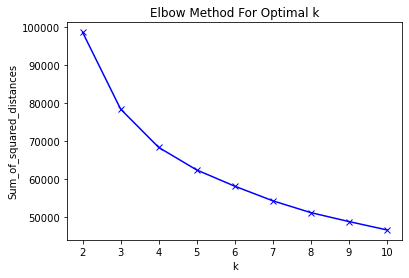

In [16]:
# find optimal number of clusters - elbow method
%matplotlib inline
Sum_of_squared_distances = []
K = range(2, 11, 1)
for k in K:
    data = deepcopy(df[corr_features])
    km = KMeans(n_clusters=k, n_init=25, max_iter=1000, tol=0.00001)
    km = km.fit(data)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xticks(K)
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [29]:
# clustering
n_clusters = 8
data = deepcopy(df[corr_features])
km = KMeans(n_clusters=n_clusters, n_init=25, max_iter=1000, tol=0.00001, algorithm='full', n_jobs=-1)    # 'elkan'
km.fit(data)
print('K-Means Inertia: {} (the smaller the better):'.format(km.inertia_))

K-Means Inertia: 51261.132942730175 (the smaller the better):


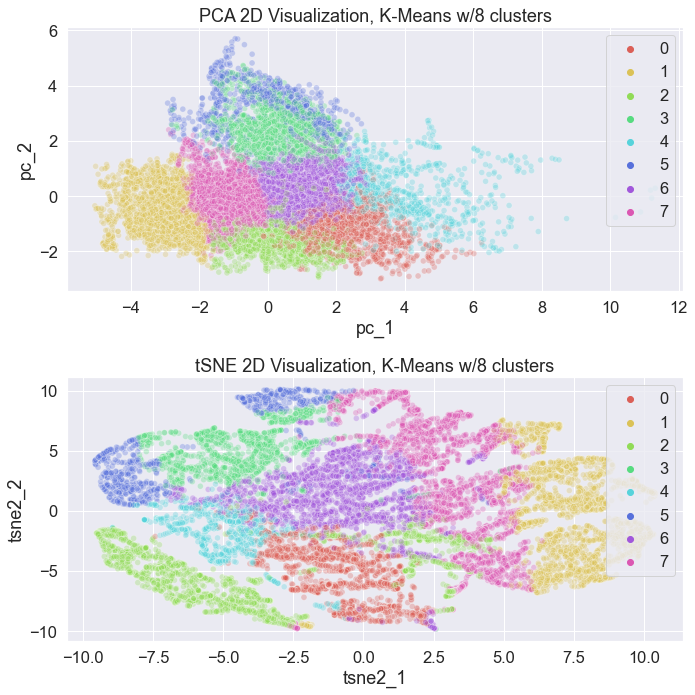

In [30]:
plot_2D_pca_tsne(data, data_tsne[['tsne2_1', 'tsne2_2']], km.labels_)

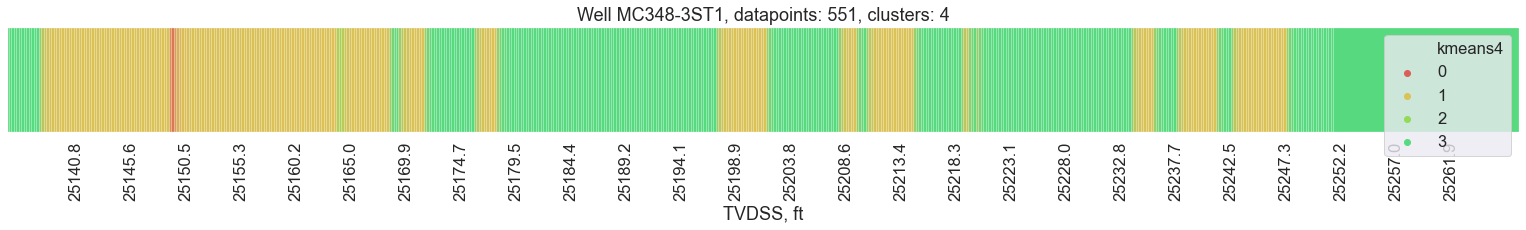

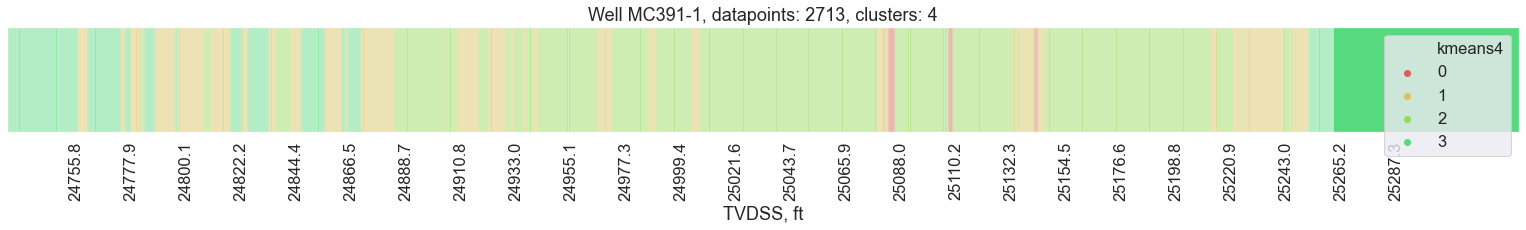

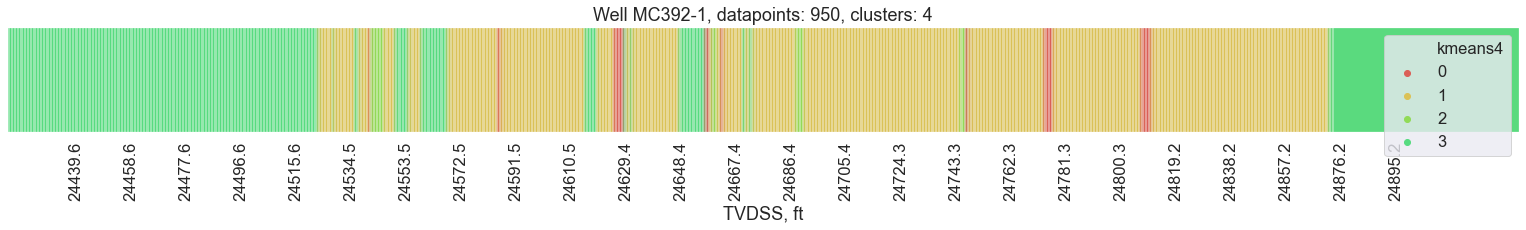

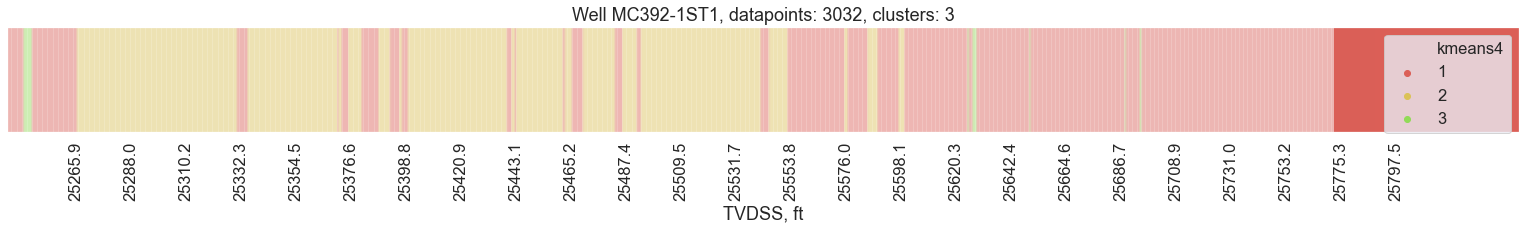

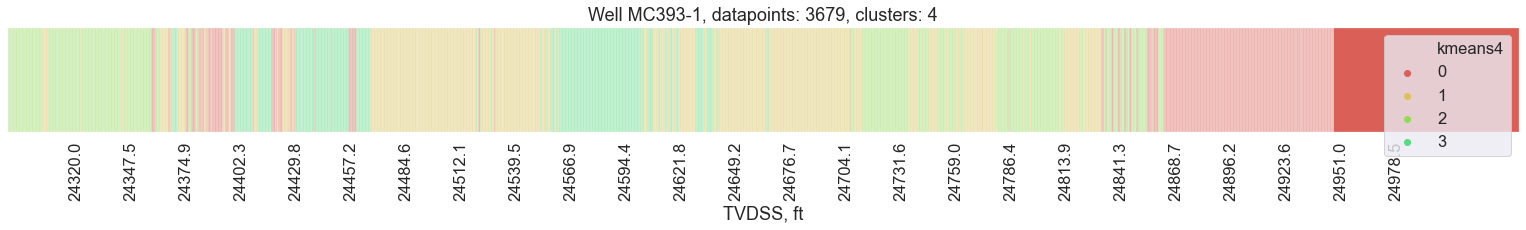

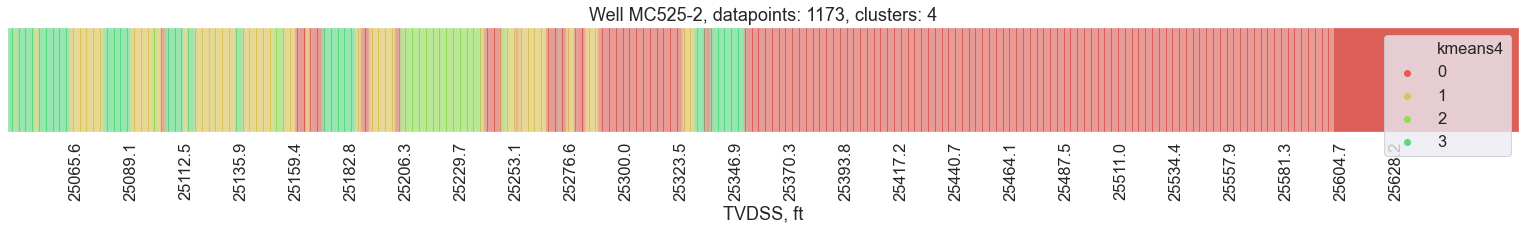

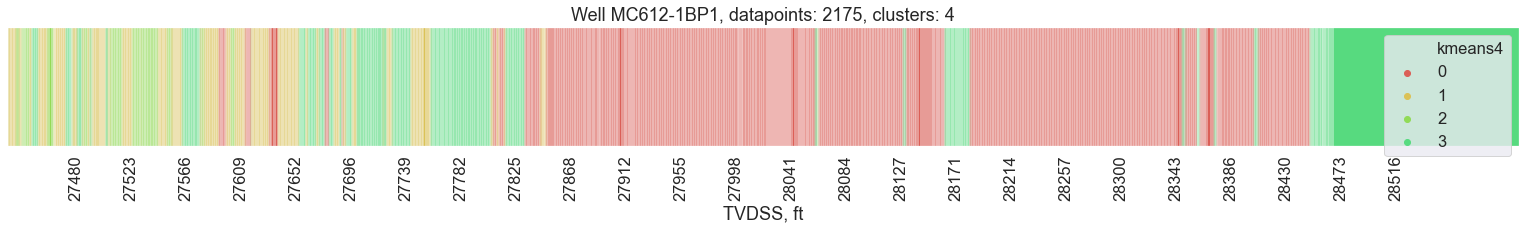

In [31]:
df['kmeans8'] = km.labels_
wells = df['Well name'].unique().tolist()

for well in wells:
    plot_well(df, well, 'kmeans4')

### SpectralClustering
Uses the graph of nearest neighbors to compute a higher-dimensional representation of the data, and then assigns labels using a k-means algorithm.

Well diagrams look cleaner, but 'MC348-3ST1' has only 2 clusters when clustering on 4 clusters, and only 3 when clustering on 8 clusters - reasonable?

In [32]:
data = deepcopy(df[corr_features])
sc_n_clusters = 5
model = SpectralClustering(n_clusters=sc_n_clusters, n_init=100, affinity='nearest_neighbors',
                           assign_labels='kmeans', n_jobs=-1) 
sc_labels = model.fit_predict(data)

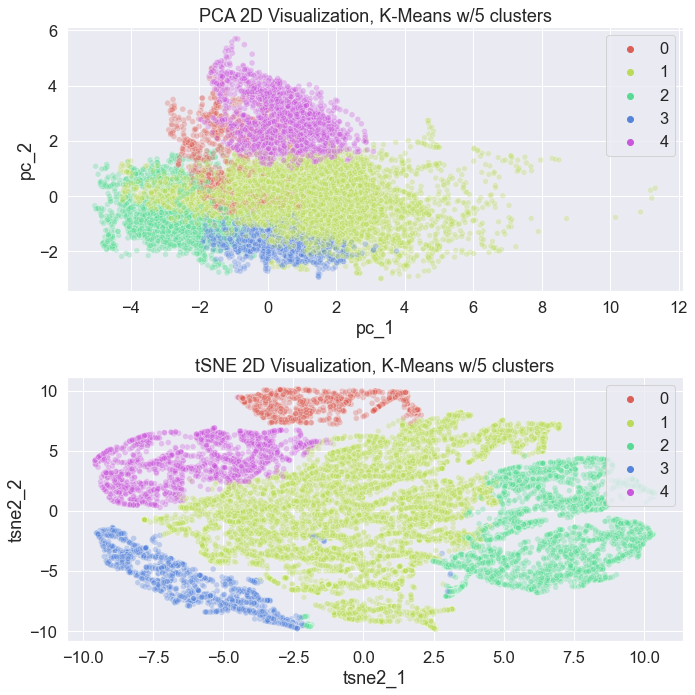

In [33]:
plot_2D_pca_tsne(data, data_tsne[['tsne2_1', 'tsne2_2']], sc_labels)

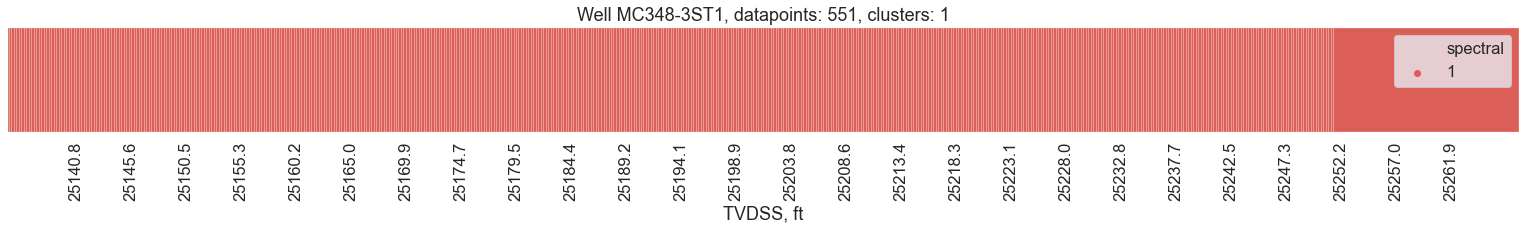

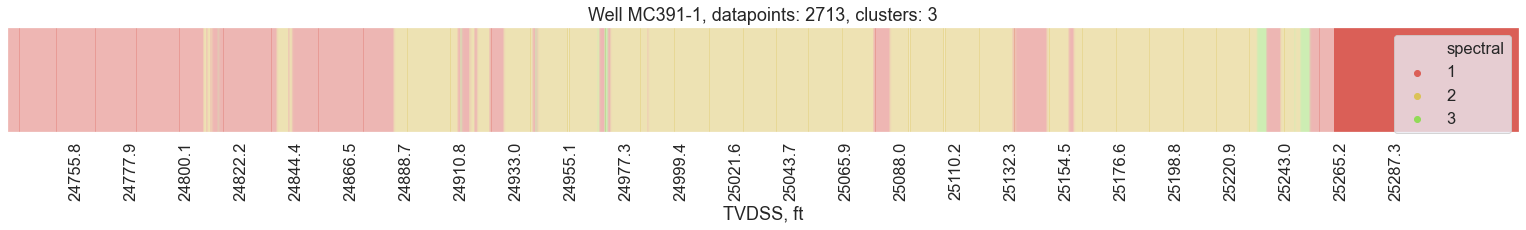

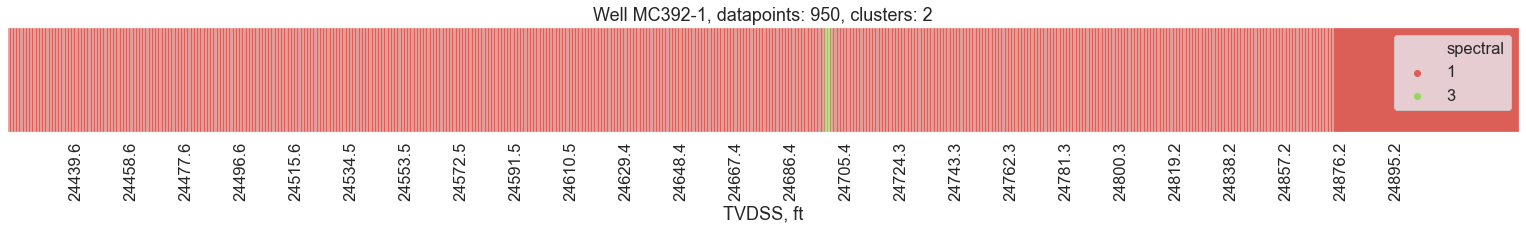

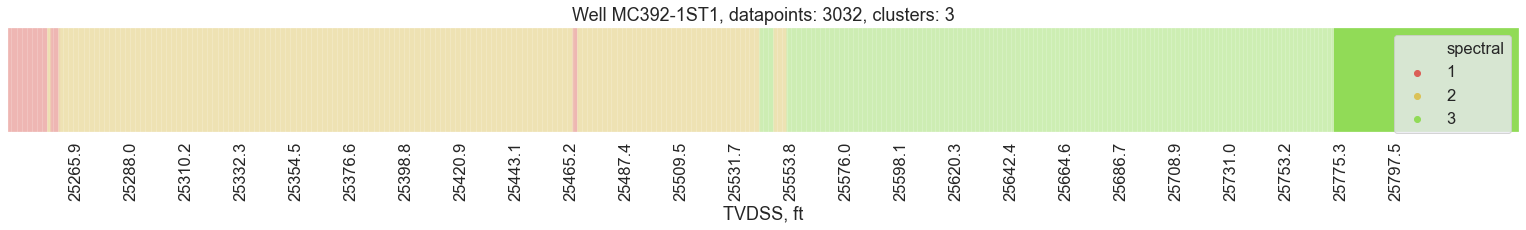

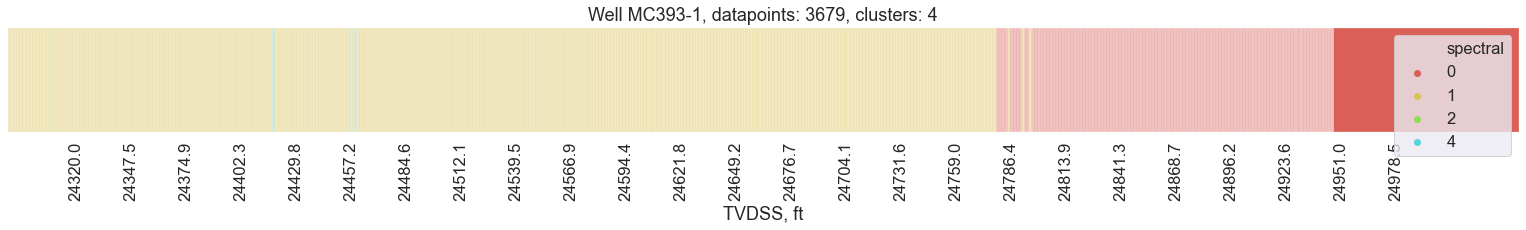

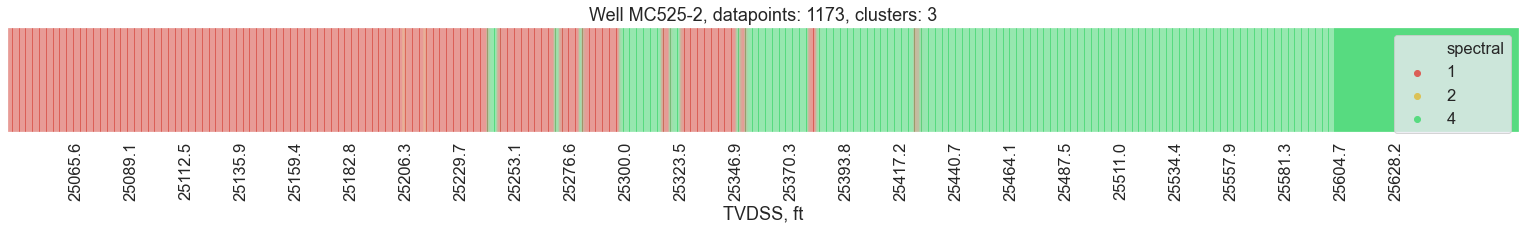

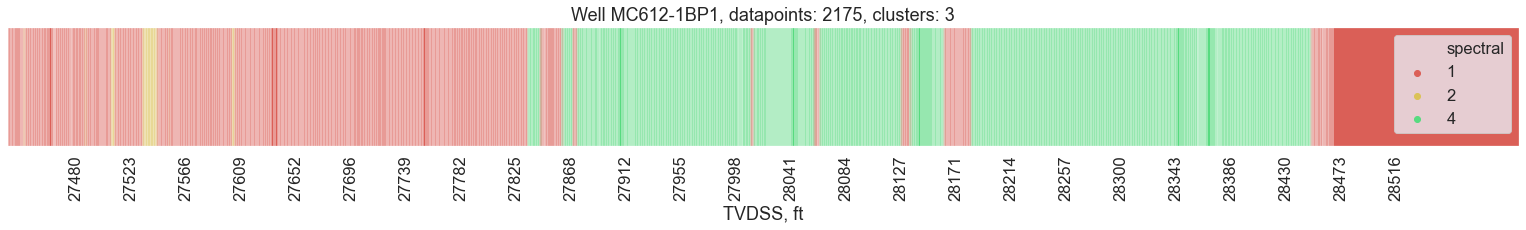

In [35]:
df['spectral'] = sc_labels
wells = df['Well name'].unique().tolist()

for well in wells:
    plot_well(df, well, 'spectral')

## Remove noise using PCA

In [36]:
noisy = deepcopy(df[corr_features])
pca = PCA(0.7).fit(noisy)
print(pca.n_components_)
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
df_filtered = pd.DataFrame(filtered)
df_filtered.head()

3


0         1         2         3         4         5         6  \
0  4.902905 -0.194667 -5.030750 -4.180212 -0.277057 -4.080478 -4.255068   
1  4.951140 -0.204426 -5.095955 -4.226327 -0.033167 -4.079066 -4.316794   
2  4.901781 -0.052293 -5.060288 -4.266244 -0.368353 -4.177394 -4.158741   
3  4.751479  0.165324 -4.929367 -4.254556 -0.804281 -4.242855 -3.869117   
4  4.420085  0.273446 -4.608827 -4.028217 -0.854440 -4.029184 -3.522210   

          7         8         9  
0 -5.084755  0.229529 -0.380547  
1 -5.108417  0.219481 -0.154967  
2 -5.098925  0.085308 -0.543766  
3 -4.998603 -0.108264 -1.055781  
4 -4.666586 -0.211815 -1.144077

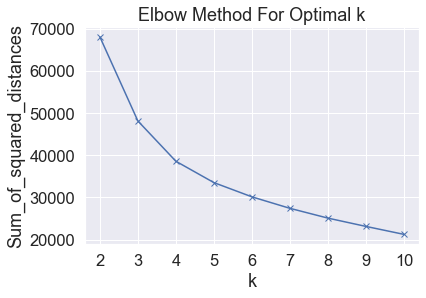

In [37]:
# find optimal number of clusters - elbow method
%matplotlib inline
Sum_of_squared_distances = []
K = range(2, 11, 1)
for k in K:
    data = deepcopy(df_filtered)
    km = KMeans(n_clusters=k, n_init=25, max_iter=1000, tol=0.00001)
    km = km.fit(data)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xticks(K)
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [47]:
# clustering
n_clusters = 8
data = deepcopy(df_filtered)
km = KMeans(n_clusters=n_clusters, n_init=25, max_iter=1000, tol=0.00001, algorithm='full', n_jobs=-1)    # 'elkan'
km.fit(data)
print('K-Means Inertia: {} (the smaller the better):'.format(km.inertia_))

K-Means Inertia: 25086.644320693624 (the smaller the better):


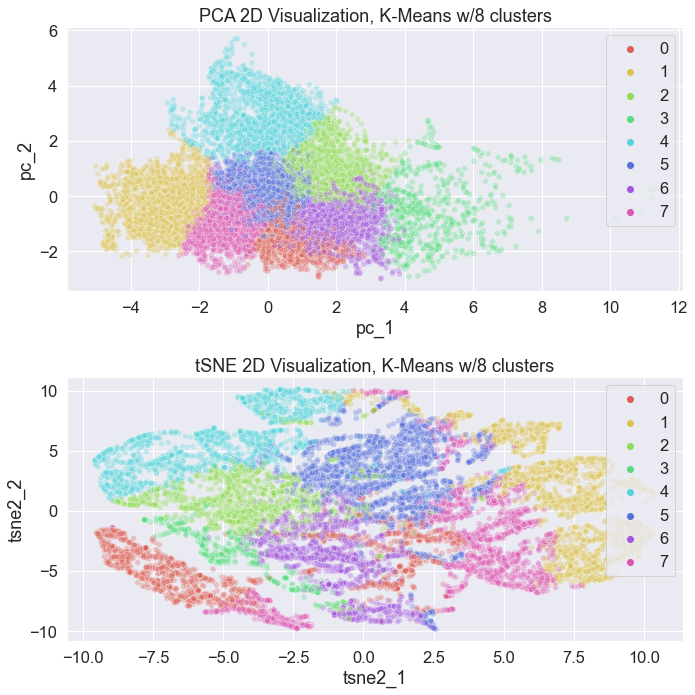

In [48]:
plot_2D_pca_tsne(data, data_tsne[['tsne2_1', 'tsne2_2']], km.labels_)

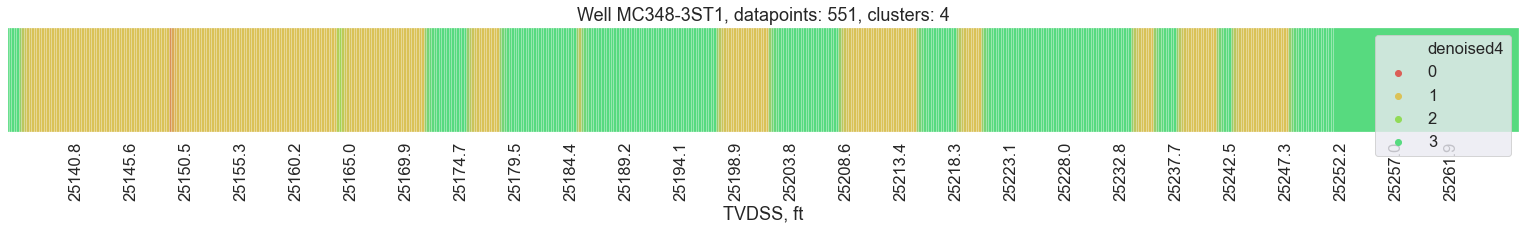

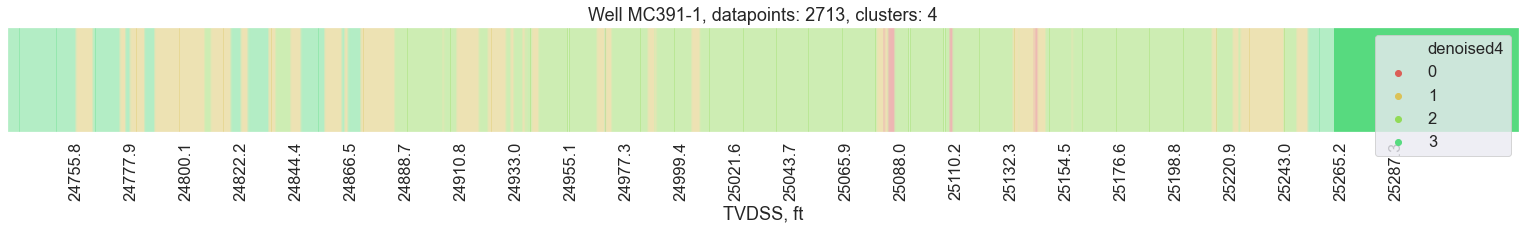

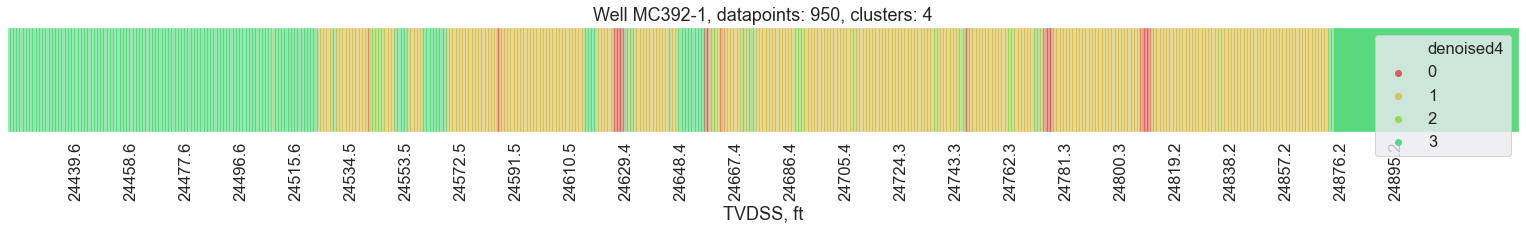

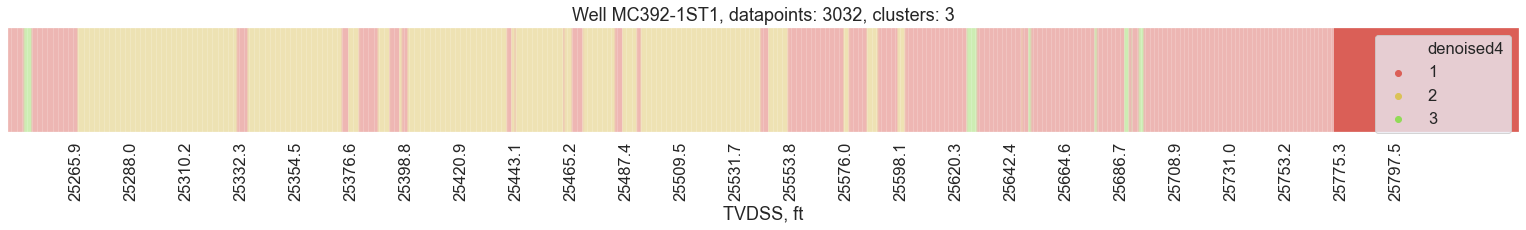

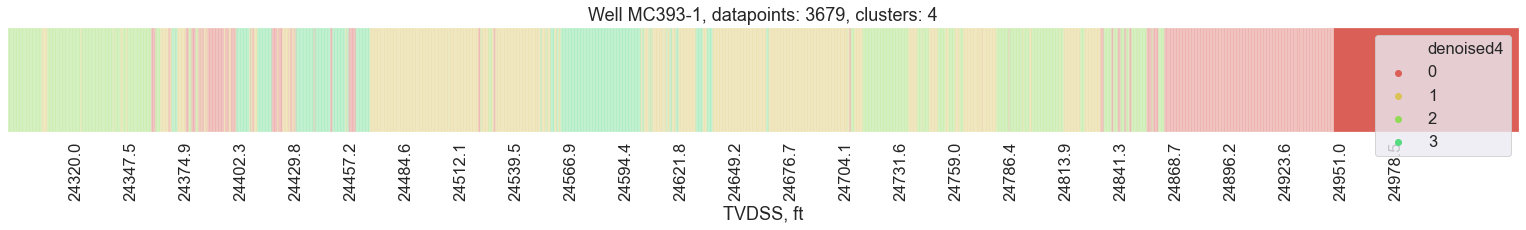

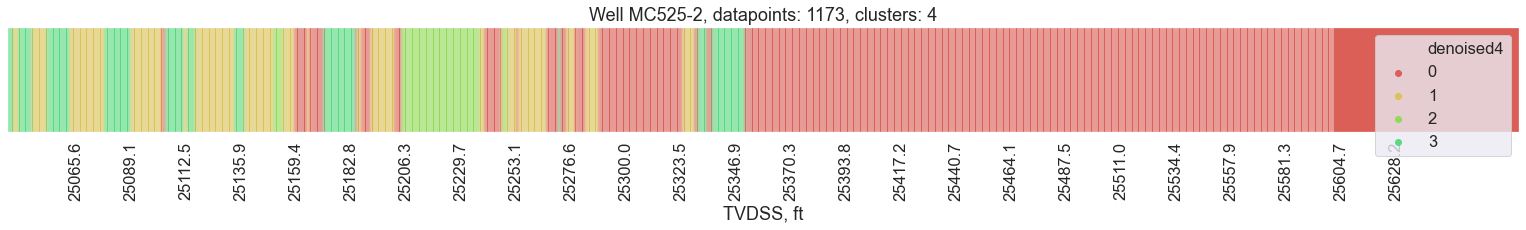

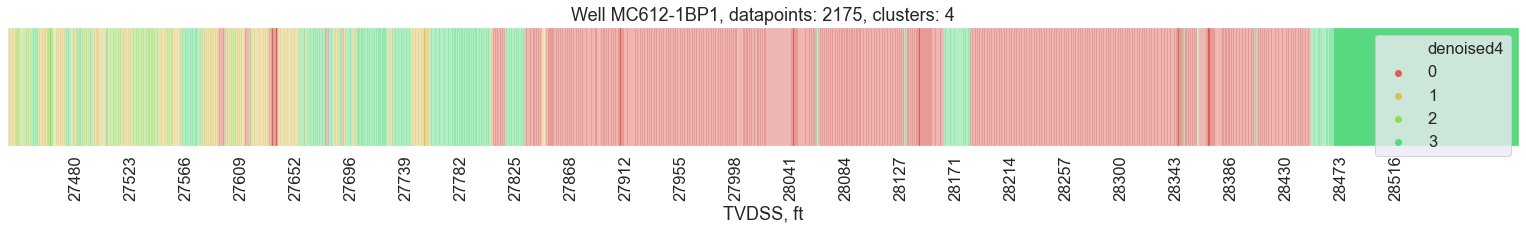

In [49]:
df['denoised8'] = km.labels_
wells = df['Well name'].unique().tolist()

for well in wells:
    plot_well(df, well, 'denoised4')

## Expectation Maximization - fine tune hyperparameters!
sklearn.mixture.GaussianMixture(n_components=1, *, covariance_type='full', tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params='kmeans', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10)

BayesianGaussianMixture(*, n_components=1, covariance_type='full', tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params='kmeans', weight_concentration_prior_type='dirichlet_process', weight_concentration_prior=None, mean_precision_prior=None, mean_prior=None, degrees_of_freedom_prior=None, covariance_prior=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10)

In [ ]:
# http://www.blackarbs.com/blog/intro-to-expectation-maximization-k-means-gaussian-mixture-models-with-python-sklearn/3/20/2017
def plot_gmm(gmm, X, label=True, ax=None):
    
    fig, ax = plt.subplots(figsize=(9,7))      
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=dot_size, cmap=cmap, zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=dot_size, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, ax=ax, alpha=w * w_factor)

In [59]:
# try the above visualization too
data = deepcopy(df[corr_features])
gm = GaussianMixture(8)
gm_labels = gm.fit_predict(data)
print(gm_labels[:10])

[2 2 2 2 2 2 2 2 2 2]


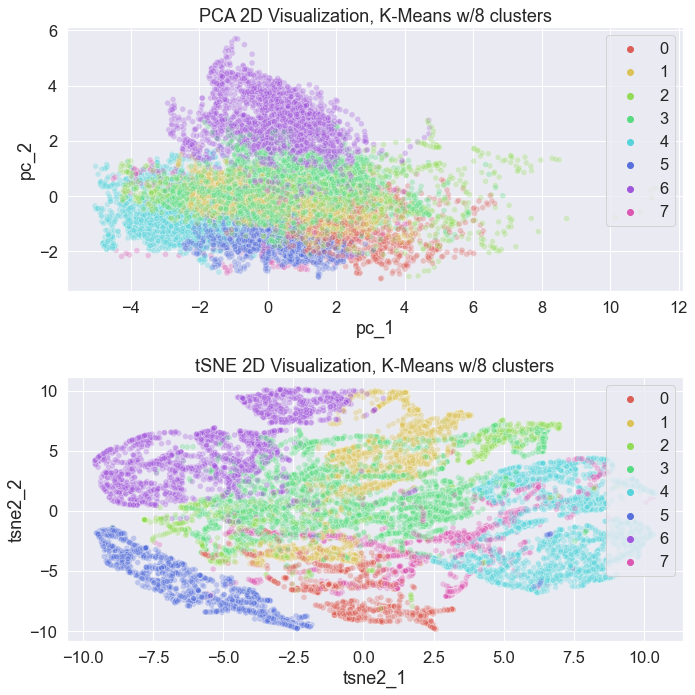

In [60]:
plot_2D_pca_tsne(data, data_tsne[['tsne2_1', 'tsne2_2']], gm_labels)

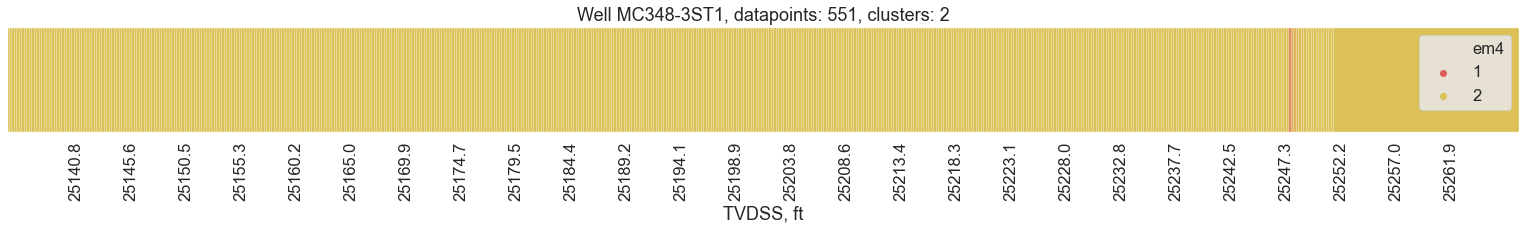

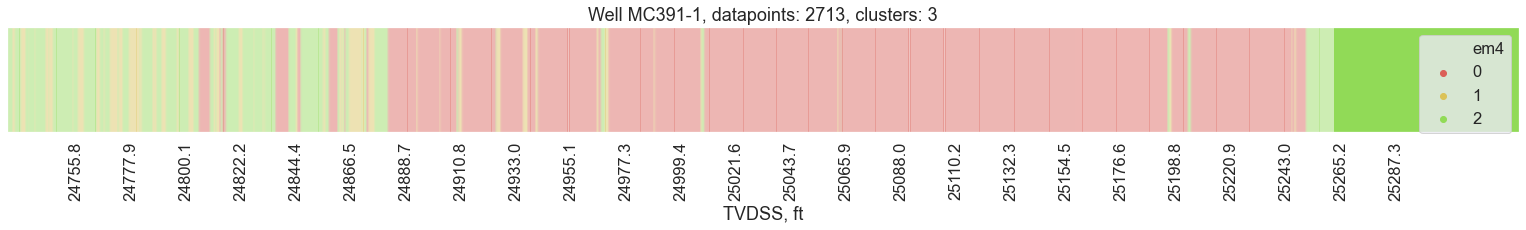

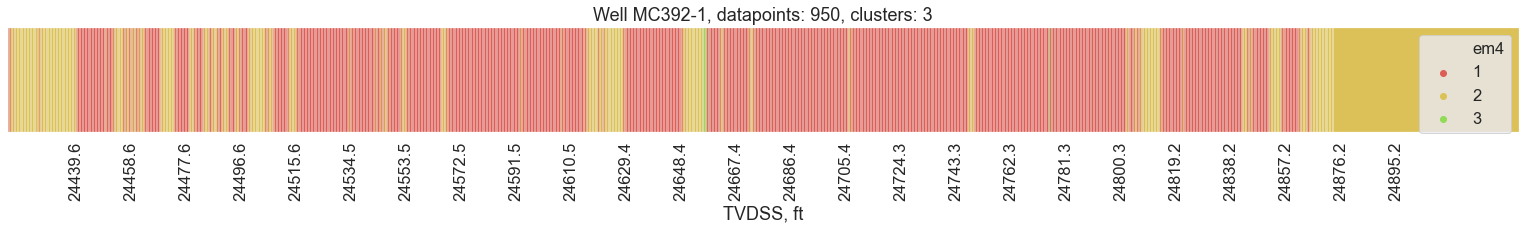

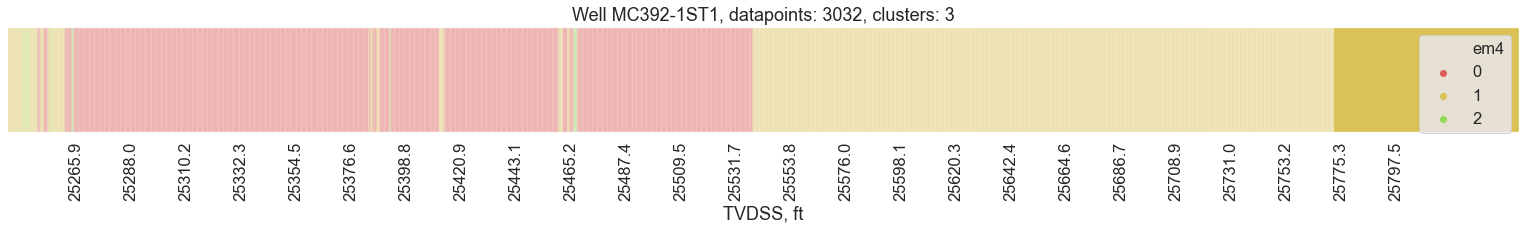

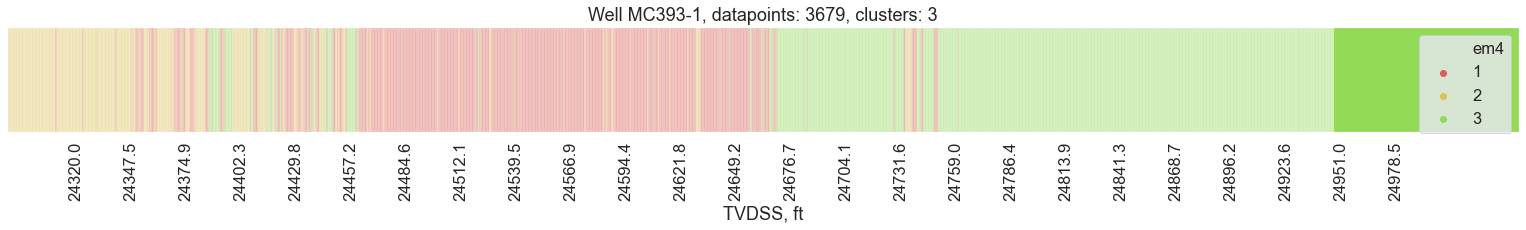

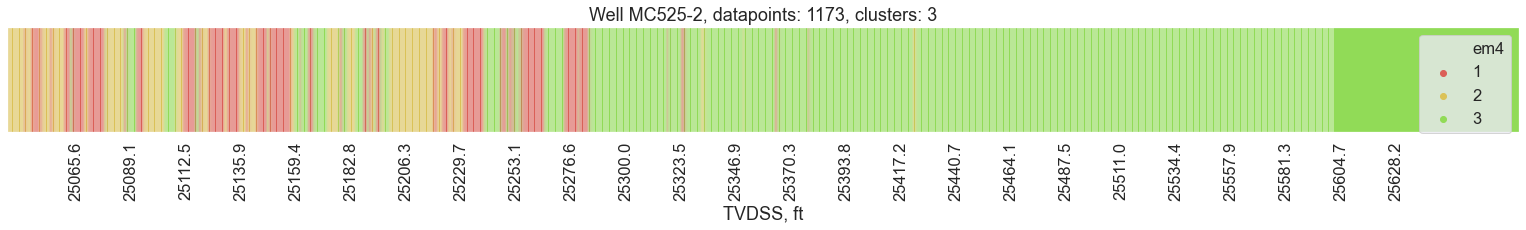

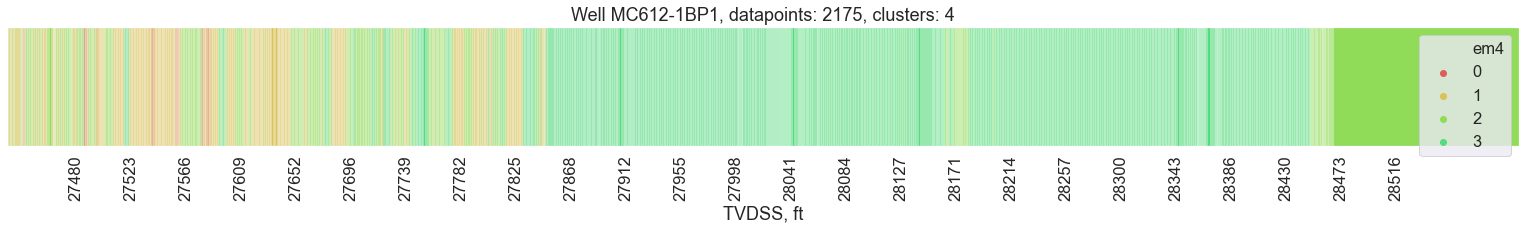

In [61]:
df['em8'] = gm_labels
wells = df['Well name'].unique().tolist()

for well in wells:
    plot_well(df, well, 'em4')

## DBSCAN
https://medium.com/@elutins/dbscan-what-is-it-when-to-use-it-how-to-use-it-8bd506293818

One issue with k-means clustering is that it assumes that all directions are equally important for each cluster. This is usually not a big problem, unless we come across with some oddly shape data (2 half circle clusters in [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html))

DBSCAN:
* does not require preset number of clusters
* can capture clusters of complex shapes
* can identify points that are not part of any cluster (very useful as outliers detector)
* works by identifying points that are in crowded regions of the feature space, where many data points are close together (dense regions in feature space); points that are within a dense region are core points
* if there are at least min_samples many data points within a distance of eps to a given data point, that data point is classified as a core sample
* core samples that are closer to each other than the distance eps are put into the same cluster by DBSCAN

__Eps__ - if too small => no points are core samples and all points are noise; if too large => all points in one single cluster  
__min_samples__ - minimum number of neighbors within eps radius. Larger the dataset, the larger value of MinPts must be chosen. As a general rule, the minimum MinPts can be derived from the number of dimensions D in the dataset as, MinPts >= D+1. The minimum value of MinPts must be chosen at least 3

#### Parameters
epsfloat, default=0.5
The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.

min_samplesint, default=5
The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.

metricstring, or callable, default=’euclidean’
The metric to use when calculating distance between instances in a feature array. If metric is a string or callable, it must be one of the options allowed by sklearn.metrics.pairwise_distances for its metric parameter. If metric is “precomputed”, X is assumed to be a distance matrix and must be square. X may be a Glossary, in which case only “nonzero” elements may be considered neighbors for DBSCAN.

New in version 0.17: metric precomputed to accept precomputed sparse matrix.

metric_paramsdict, default=None
Additional keyword arguments for the metric function.

New in version 0.19.

algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
The algorithm to be used by the NearestNeighbors module to compute pointwise distances and find nearest neighbors. See NearestNeighbors module documentation for details.

leaf_sizeint, default=30
Leaf size passed to BallTree or cKDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.

pfloat, default=None
The power of the Minkowski metric to be used to calculate distance between points.

n_jobsint, default=None
The number of parallel jobs to run. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

In [62]:
# eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None
data = deepcopy(df[corr_features])
dbscan = DBSCAN(eps=0.9, min_samples = 50)
dbscan_clusters = dbscan.fit_predict(data)

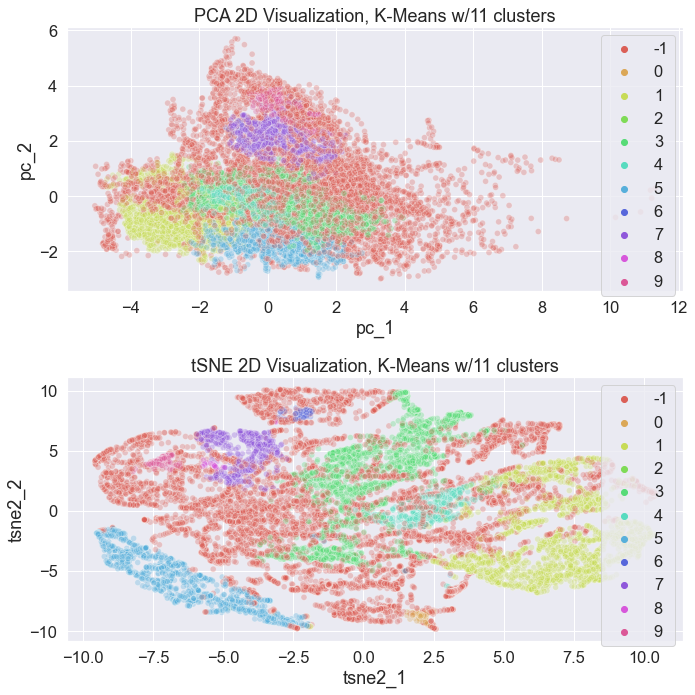

In [63]:
plot_2D_pca_tsne(data, data_tsne[['tsne2_1', 'tsne2_2']], dbscan_clusters)

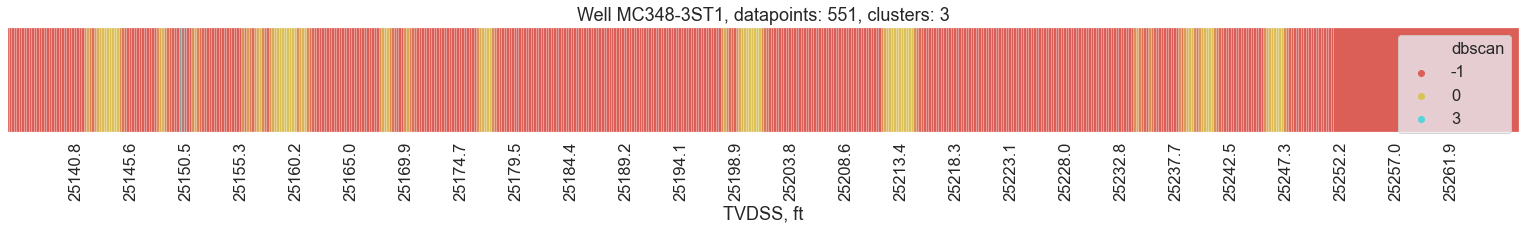

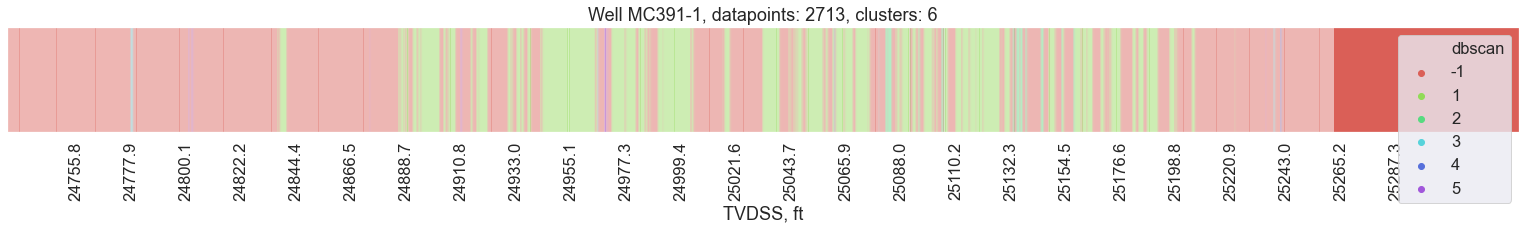

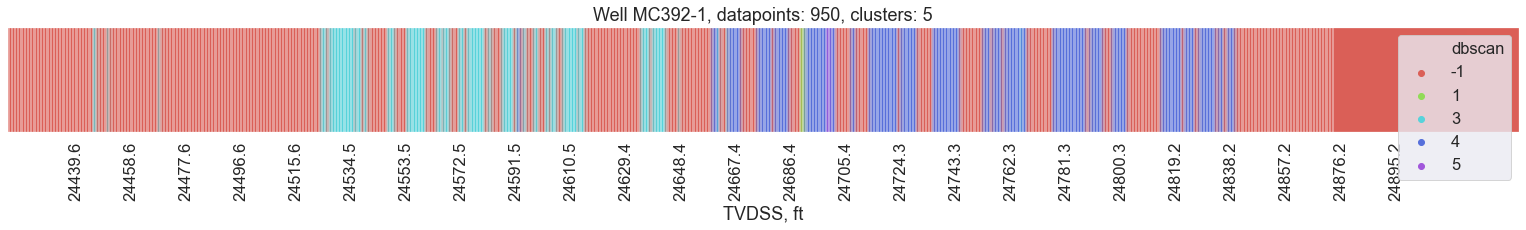

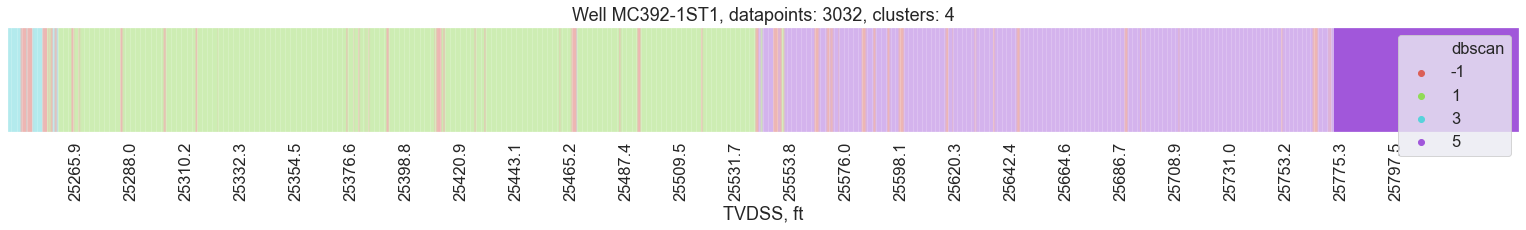

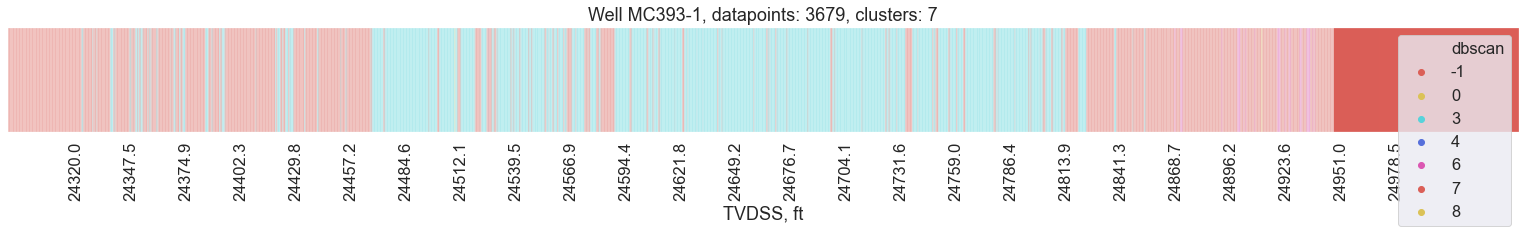

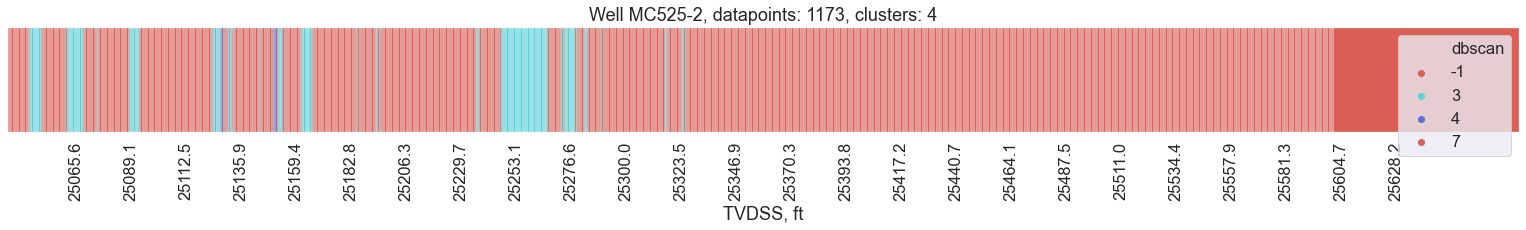

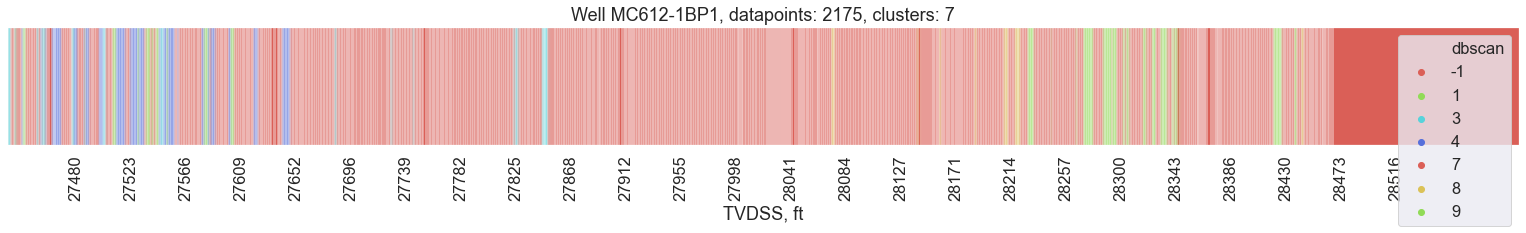

In [64]:
df['dbscan'] = dbscan_clusters
wells = df['Well name'].unique().tolist()

for well in wells:
    plot_well(df, well, 'dbscan')

In [68]:
df.to_csv('norphlet_scaled_clustered_20200519.csv', index=False)

## Hierarchical clustering
https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/

## Next Ideas

In [ ]:
# second idea: EM = my hw + Data Science book on kmeans

In [ ]:
# third idea = regressor for NMR_FF? w/careful feature selection?
# But not for TVDSS for sure as clustering results show that the same facies may occur at different depths

In [ ]:
# fourth idea - remove noise, then create a regressor for a) TVDSS, b) NMR_FF? Maybe don't use all the features?
pca = PCA(0.50).fit(noisy)
print(pca.n_components_)
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
df_filtered = pd.DataFrame(filtered)
df_filtered.head()

## Silhouette method for estimating best number of clusters

Automatically created module for IPython interactive environment
For n_clusters = 3 the average silhouette_score is : 0.4199092501709702
For n_clusters = 4 the average silhouette_score is : 0.4009465249825306
For n_clusters = 5 the average silhouette_score is : 0.35087816238234315
For n_clusters = 6 the average silhouette_score is : 0.3643665726695646
For n_clusters = 7 the average silhouette_score is : 0.35289248880948465
For n_clusters = 8 the average silhouette_score is : 0.36761112537804175
For n_clusters = 9 the average silhouette_score is : 0.35776425300178716
For n_clusters = 10 the average silhouette_score is : 0.35324438715306294
For n_clusters = 11 the average silhouette_score is : 0.3436745105046185
For n_clusters = 14 the average silhouette_score is : 0.34639383081831565
For n_clusters = 16 the average silhouette_score is : 0.33945585039190546
For n_clusters = 18 the average silhouette_score is : 0.3378646471168741
For n_clusters = 20 the average silhouette_score is : 0.337

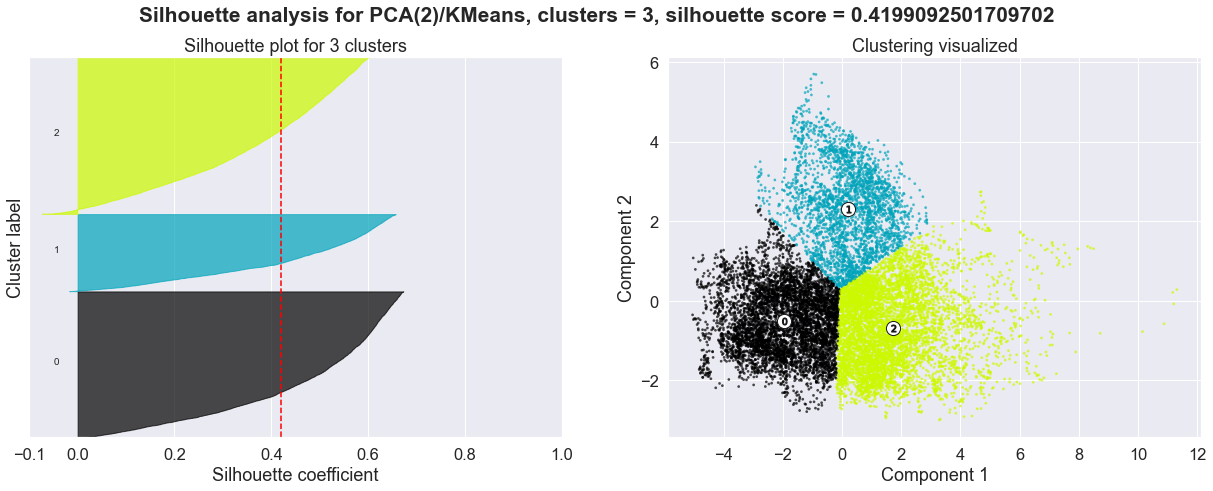

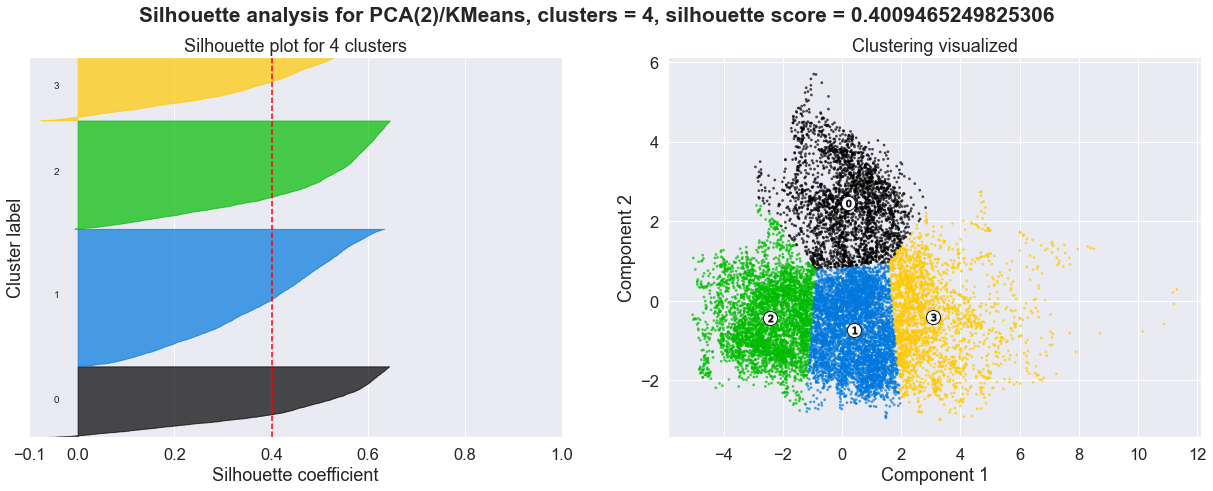

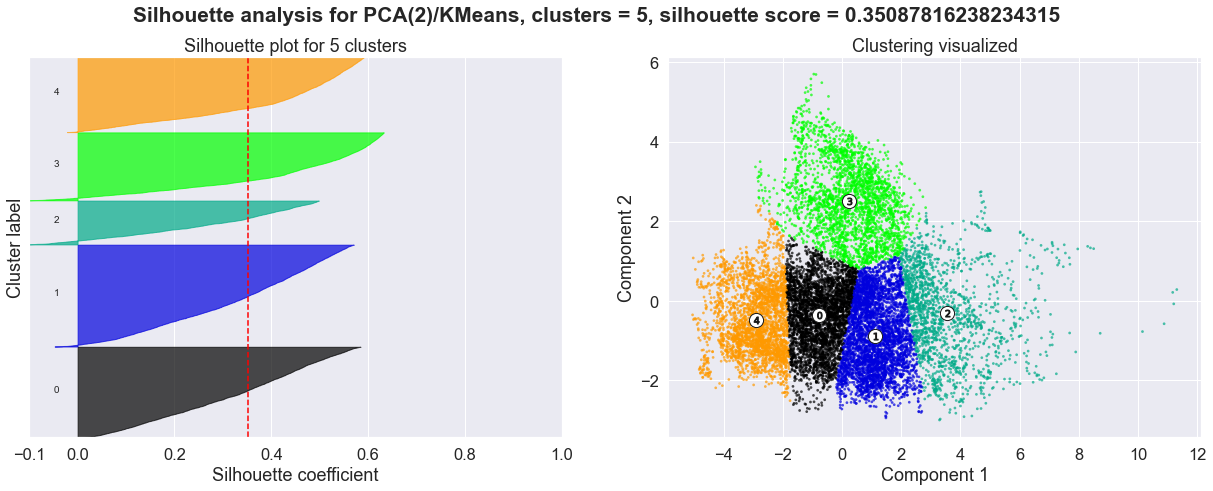

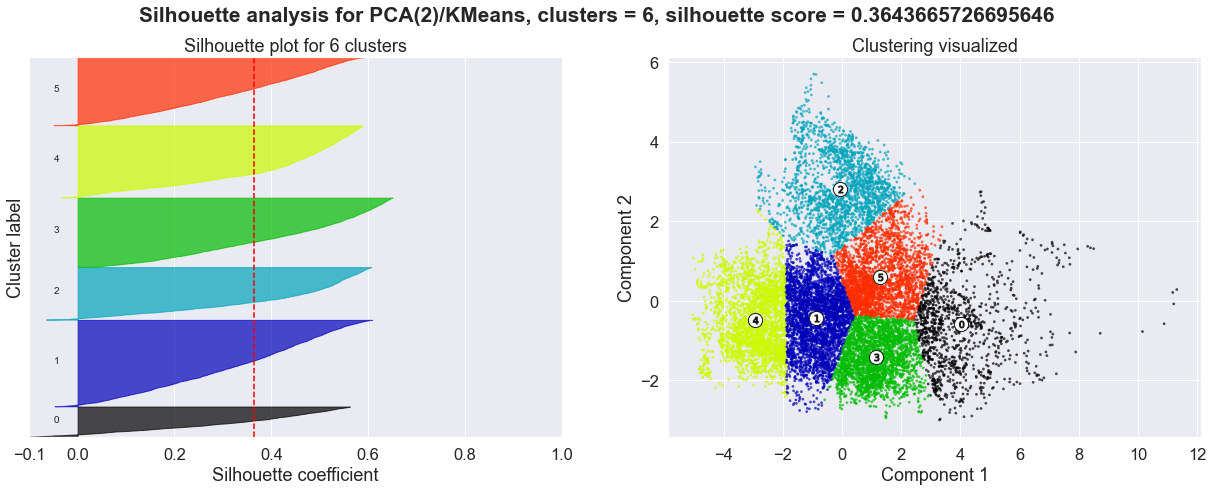

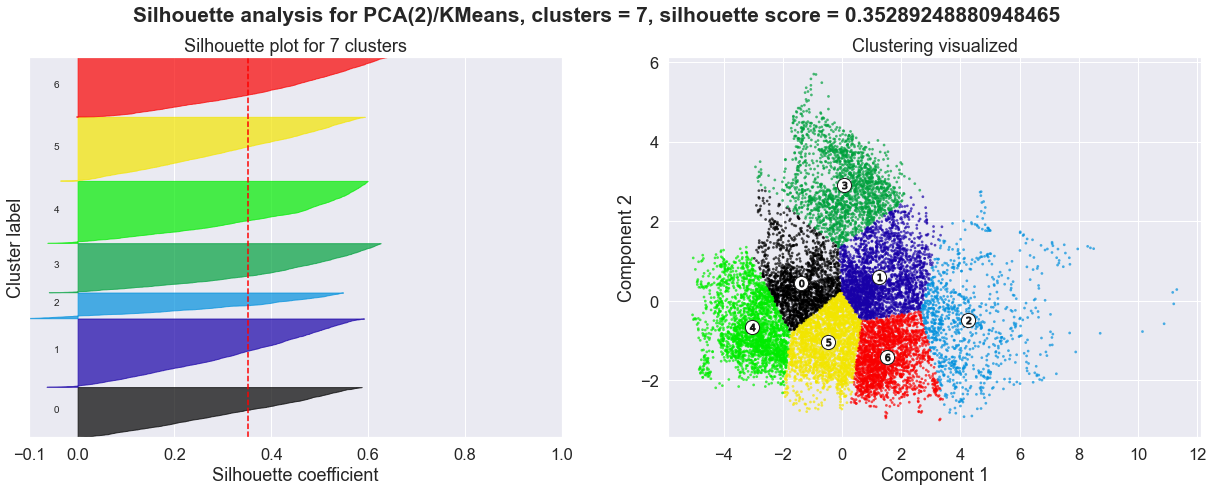

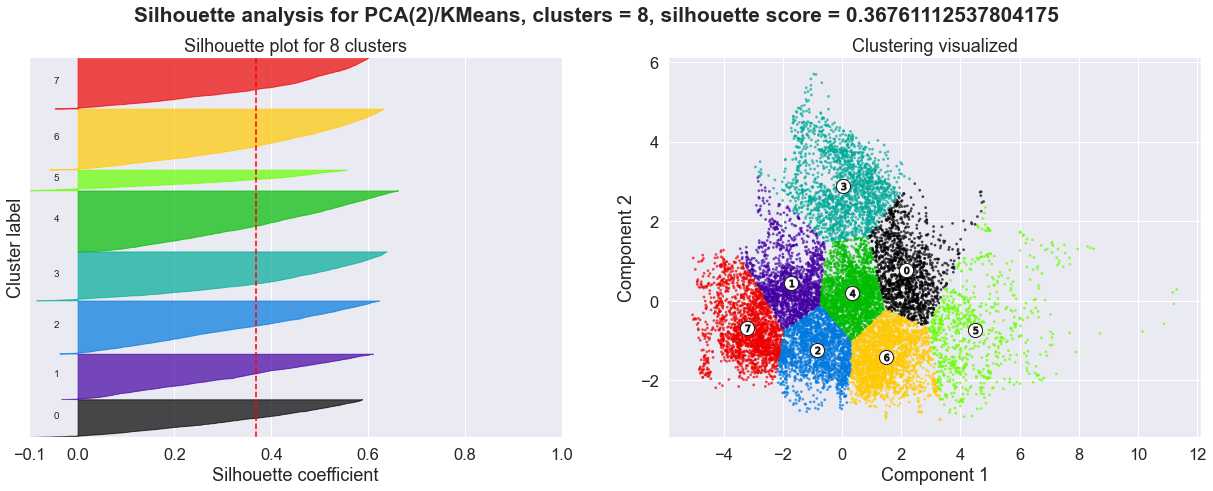

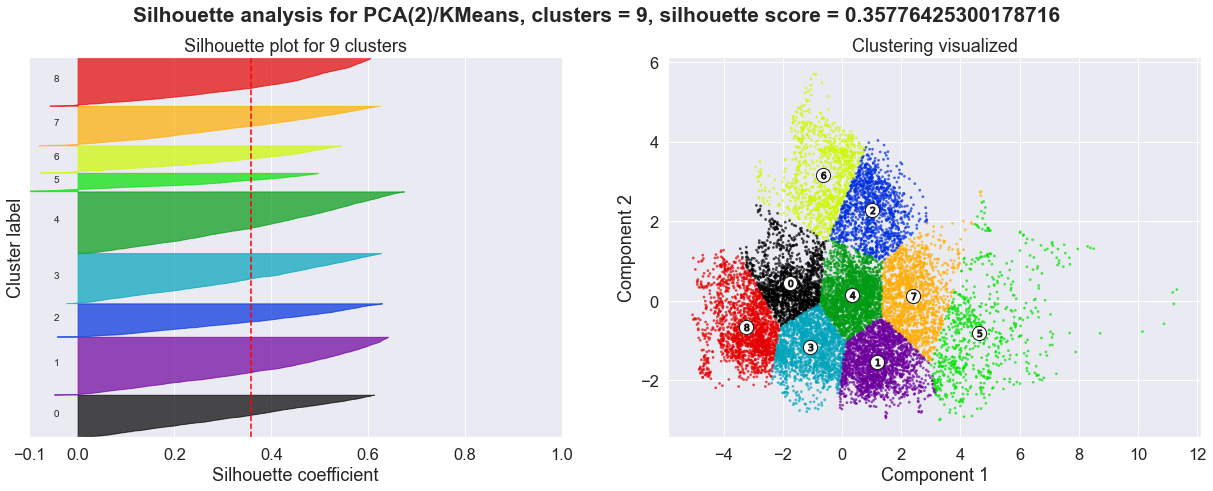

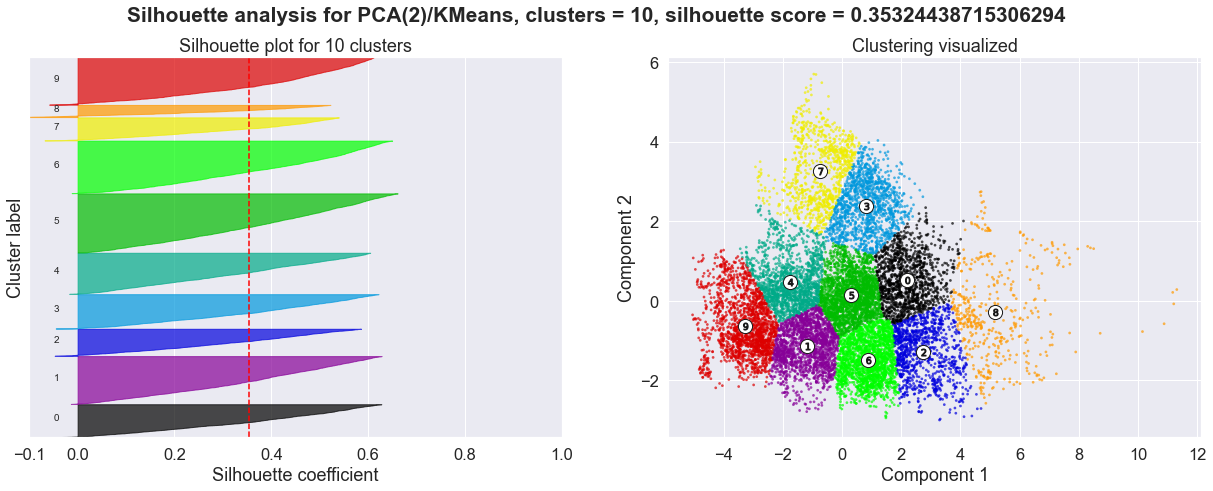

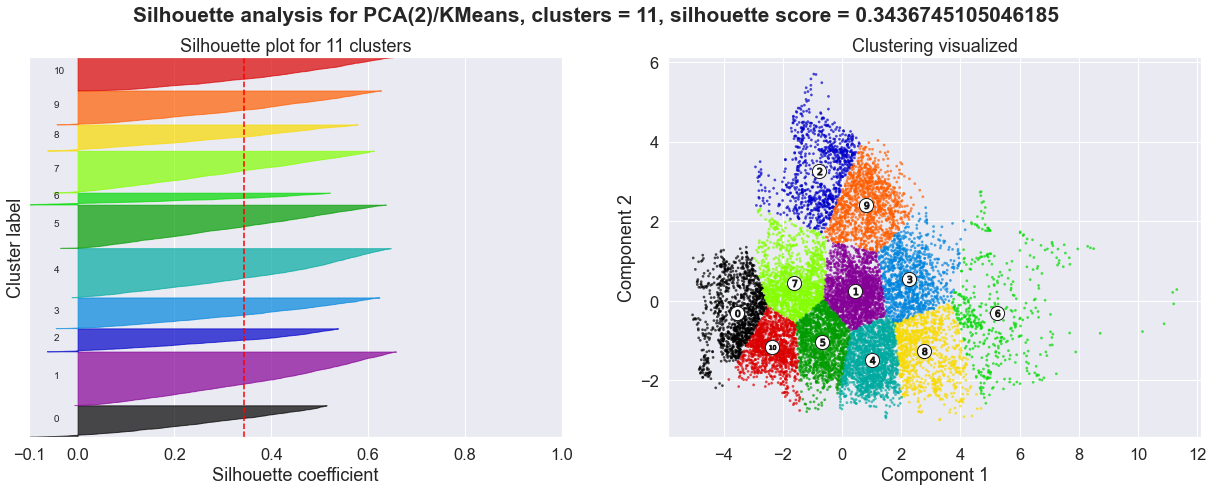

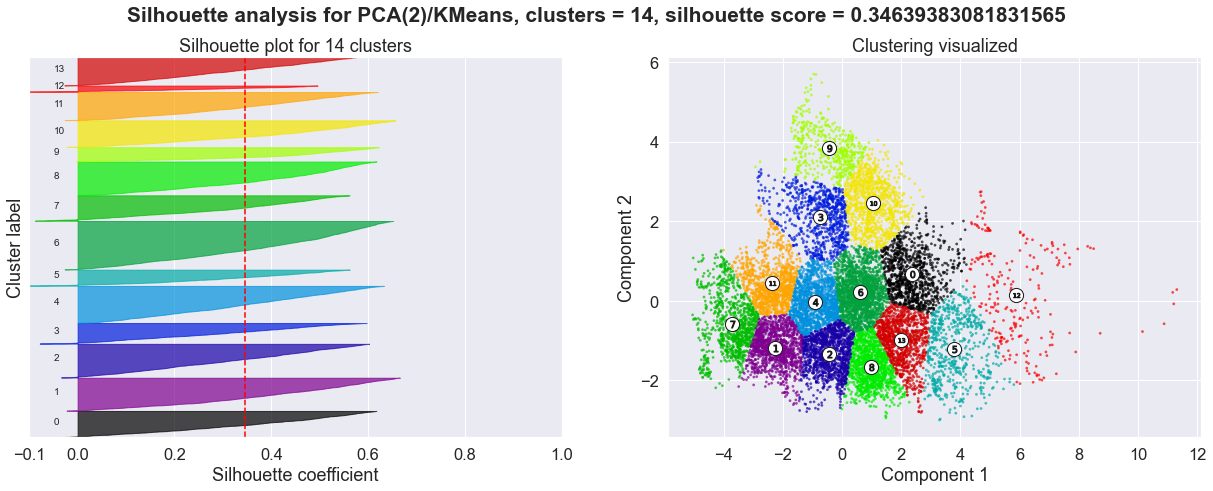

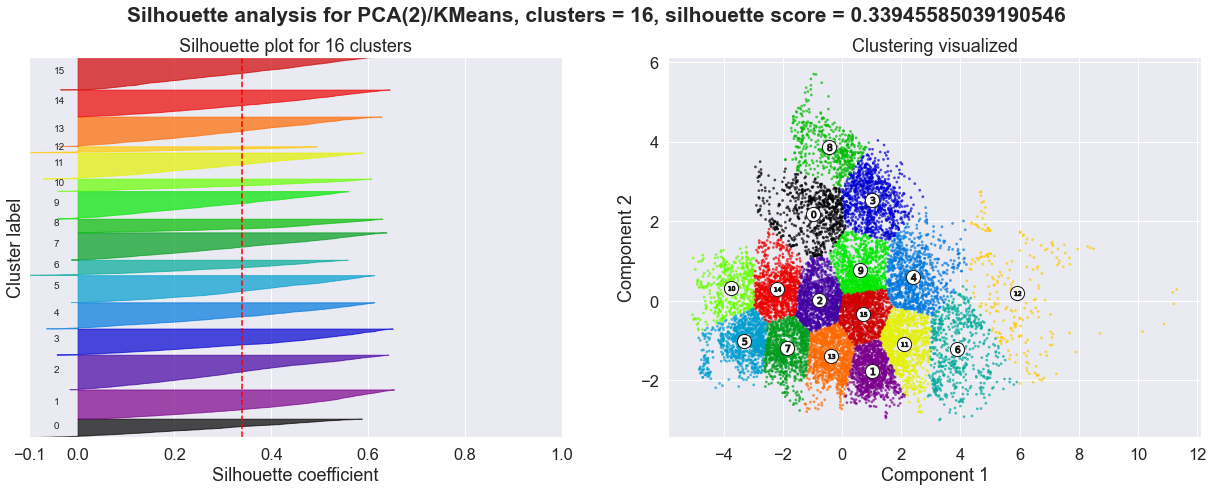

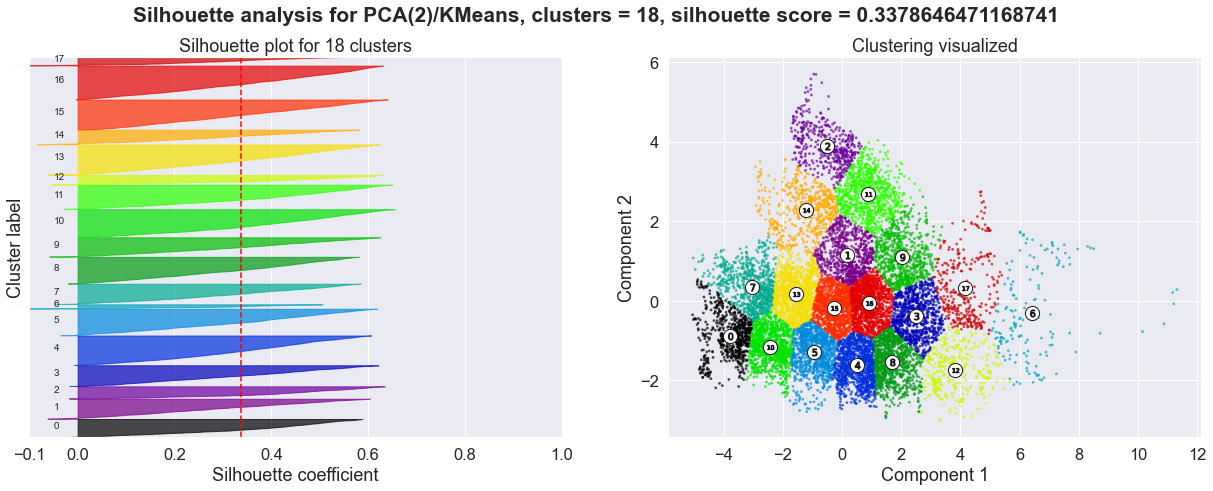

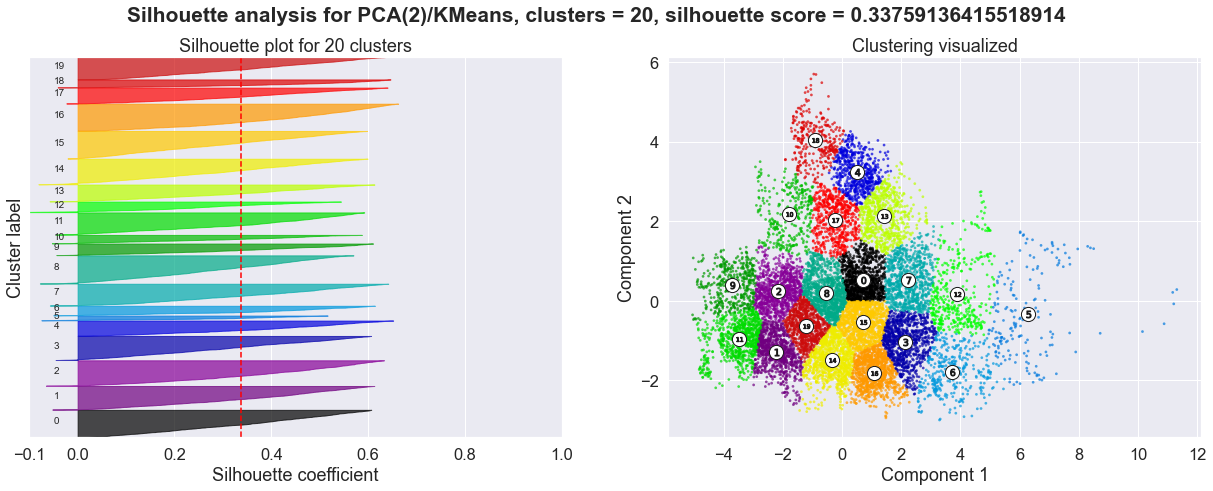

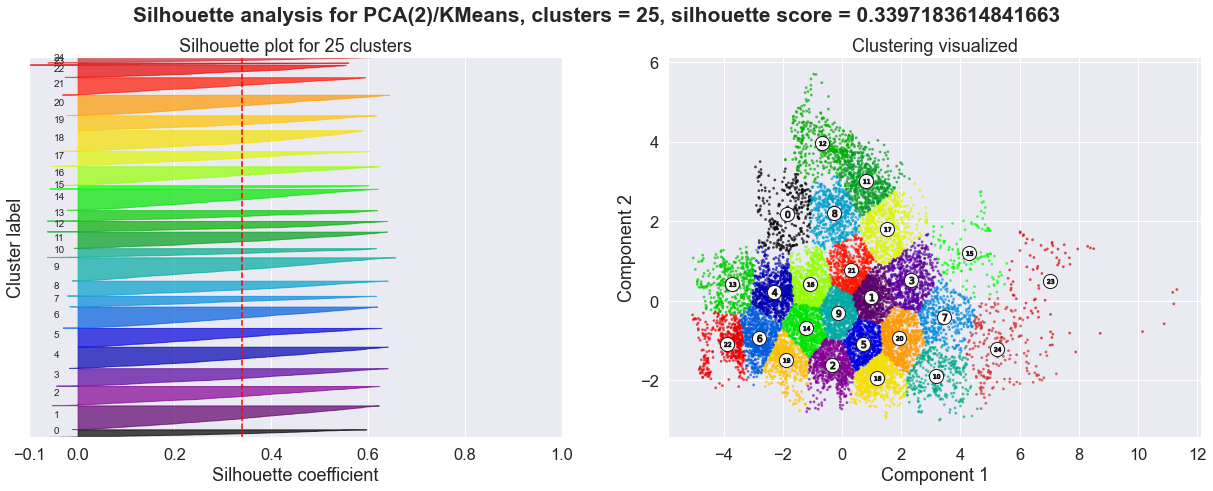

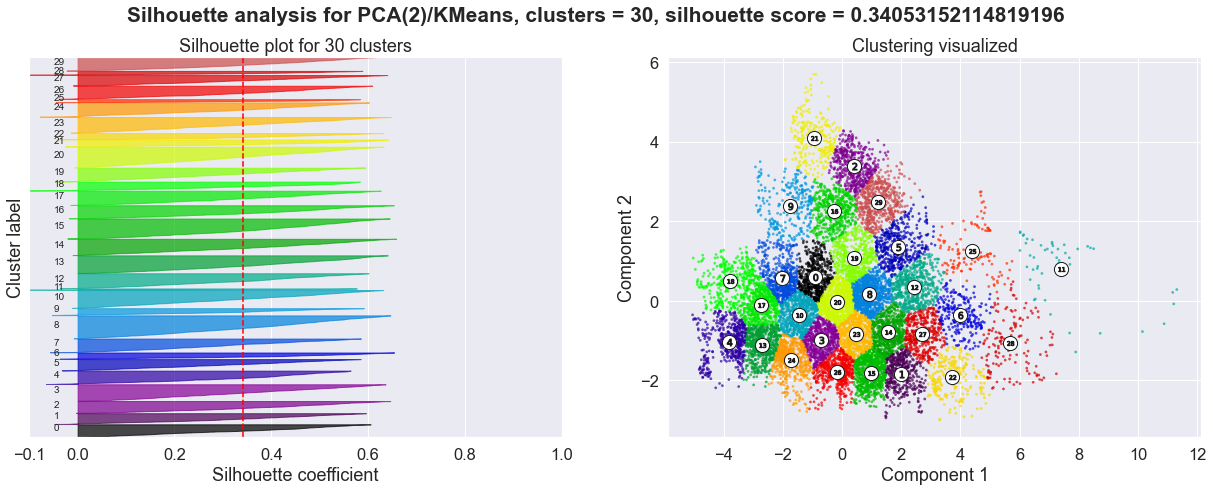

In [65]:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline

print(__doc__)

# Generating the sample data from make_blobs: one distinct cluster and 3 clusters placed close together.
#X, y = make_blobs(n_samples=500,
#                  n_features=2,
#                  centers=4,
#                  cluster_std=1,
#                  center_box=(-10.0, 10.0),
#                  shuffle=True,
#                  random_state=1)  # For reproducibility

pca_local = PCA(2)
X = deepcopy(df[corr_features])
X = pca_local.fit_transform(X)

range_n_clusters = [3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 16, 18, 20, 25, 30]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(21, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "the average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette plot for {} clusters".format(n_clusters))
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed    
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Clustering visualized")
    ax2.set_xlabel("Component 1")
    ax2.set_ylabel("Component 2")

    plt.suptitle("Silhouette analysis for PCA(2)/KMeans, clusters = {}, silhouette score = {}".format(n_clusters, silhouette_avg),
                 fontsize=21, fontweight='bold')

plt.show()
X = None

## Appendix (irrelevant)

### Another way to apply tSNE - PCA first to reduce features (much faster than tSNE on hundreds of features)

In [ ]:
# PCA first, then tSNE - for a large number of features, but do I raelly need it here? I don't think so
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(data_subset)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))
# then do tSNE on pca_result_50

### Plot multi-colored line (matplotlib)

In [ ]:
import numpy as np
import pylab as pl
from matplotlib import collections  as mc

lines = [[(0, 1), (1, 1)], [(2, 3), (3, 3)], [(1, 2), (1, 3)]]
c = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])

lc = mc.LineCollection(lines, colors=c, linewidths=2)
fig, ax = pl.subplots()
ax.add_collection(lc)
ax.autoscale()
ax.margins(0.1)

### 2D as Matplotlib visualization (sns is better)

In [ ]:
# 2D plot, matplotlib (no sns)
def plot_2d(data, prev_pca):
      
    # dimensionality reduction
    pca_2 = PCA(2)
    projected = pca_2.fit_transform(data)
    print('PCA_1 vs. orig. Explained variance:', sum(prev_pca.explained_variance_ratio_))
    print('PCA_2 vs. PCA_1 Explained variance:', sum(pca_2.explained_variance_ratio_))
    
    # plotting
    plt.figure(figsize=(15,10))
    plt.scatter(projected[:, 0], projected[:, 1], c=km.labels_, edgecolor='none', alpha=0.3,
                cmap=plt.cm.get_cmap('rainbow', 7))
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.colorbar()